First lets take care of imports and stuff

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import country_converter as coco
import seaborn as sns
import scipy.stats
import seaborn as sns

Now lets read the file and save it to a dataframe

In [5]:
VisualDataset = pd.read_csv("visual-dataset.csv")
VisualDataset

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Climate Watch,Total excluding LUCF,All GHG,11.630795,11.899993,11.548263,11.678756,11.733048,12.181318,...,32.446461,30.928572,30.430300,31.165816,31.619074,30.864984,31.750550,32.580491,32.736769,31.119045
1,AFG,Climate Watch,Total including LUCF,All GHG,9.242054,9.511253,9.159522,9.290015,9.344308,9.792578,...,32.200242,30.682353,30.184081,30.919597,31.372855,31.019641,31.905208,32.735148,32.891427,31.273703
2,AFG,Climate Watch,Energy,All GHG,2.282585,2.137723,1.682461,1.644298,1.570636,1.495373,...,13.323343,11.756450,11.145356,11.233063,12.198269,11.412760,12.184251,13.134042,13.431233,10.891524
3,AFG,Climate Watch,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,...,0.314576,0.394037,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746,1.384823
4,AFG,Climate Watch,Agriculture,All GHG,8.066884,8.390468,8.403524,8.480484,8.517963,8.951019,...,15.902260,15.777792,15.724861,16.220447,15.536815,15.297501,15.207134,14.839391,14.481235,15.145087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,ZWE,Climate Watch,Industrial Processes,F-Gas,0.067604,0.064739,0.061875,0.059011,0.056146,0.053282,...,0.379388,0.434782,0.490176,0.545570,0.600965,0.665562,0.730160,0.794758,0.859356,0.923953
11111,ZWE,Climate Watch,Total including LUCF,CO2,26.937019,28.702519,28.871119,27.477119,26.362019,25.885119,...,22.676568,23.273868,23.535768,23.329668,23.307668,97.612939,96.943739,98.232639,97.348039,95.475239
11112,ZWE,Climate Watch,Total including LUCF,CH4,9.662037,8.768886,9.374550,7.846036,8.514207,8.913009,...,12.722548,12.589129,12.452970,11.453169,12.397747,11.970545,12.106828,12.406365,12.539140,12.084016
11113,ZWE,Climate Watch,Total including LUCF,N2O,5.900270,5.314127,5.373505,4.744034,4.915282,4.818041,...,6.347263,5.936318,5.709636,5.015510,5.551648,5.075015,5.222505,5.324948,5.284441,4.716090


# Pre-Processing the Data

The data set contains 5 columns.
Country --> Identifies a country by it's 3 letter code;
Source --> Data Source;
Gas --> The gast group. for example F-Gas are the group of Florine gases;
1990 until 2020 --> The years 

Some things i can already see:
1- can group countries into continents;
2- can make an average for each country;
3- can make a column with the highest value and the lowest value;
4- can view the 5 biggest polluters/emiters over the years;
5- can also group each country into a single row! 

We have to do some pre-processing of the data. cleaning like deleting duplicate entries and such.

### First we will take care of duplicates

In [6]:
#Deleting duplicates: (no duplicates)
VisualDataset.drop_duplicates( keep = 'first',  inplace = True)
#VisualDataset

#checking for duplicates (no duplciates)
VisualDataset.duplicated().sum()



0

### Take care of missing values. Since there are quite a few of them,
they will be imputed/replaced with the average

In [7]:
#Checking for missing values
VisualDataset.isnull().sum()

#Since there are a lot of values missing, i will impute/replace them 
#with the average 
#VisualDatasetSimplified.iloc[:, 4:34].mean(axis=1)
VisualDataset.fillna(VisualDataset.iloc[:, 4:35].mean(), inplace=True)
VisualDataset.head()

#Rechecking for missing values (worked)
#VisualDataset.isnull().sum()


,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Climate Watch,Total excluding LUCF,All GHG,11.630795,11.899993,11.548263,11.678756,11.733048,12.181318,...,32.446461,30.928572,30.430300,31.165816,31.619074,30.864984,31.750550,32.580491,32.736769,31.119045
1,AFG,Climate Watch,Total including LUCF,All GHG,9.242054,9.511253,9.159522,9.290015,9.344308,9.792578,...,32.200242,30.682353,30.184081,30.919597,31.372855,31.019641,31.905208,32.735148,32.891427,31.273703
2,AFG,Climate Watch,Energy,All GHG,2.282585,2.137723,1.682461,1.644298,1.570636,1.495373,...,13.323343,11.756450,11.145356,11.233063,12.198269,11.412760,12.184251,13.134042,13.431233,10.891524
3,AFG,Climate Watch,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,...,0.314576,0.394037,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746,1.384823
4,AFG,Climate Watch,Agriculture,All GHG,8.066884,8.390468,8.403524,8.480484,8.517963,8.951019,...,15.902260,15.777792,15.724861,16.220447,15.536815,15.297501,15.207134,14.839391,14.481235,15.145087


### Finally, lets normalize the values
Some algorithims respond well to this, like Linear regressions, but normalization can amplify the effects of outliers

In [8]:
# #Lets get all the year columns
# columns_to_normalize = VisualDataset.columns.difference(['Country', 'Source', 'Sector', 'Gas'])
# columns_to_normalize

# #using the standard min max scaler
# scaler = MinMaxScaler()

# # #using the Zscaler
# # scaler = StandardScaler()

# VisualDataset[columns_to_normalize] = scaler.fit_transform(VisualDataset[columns_to_normalize])
# VisualDataset.head()

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Extra work for extra points (cummulative values across the last 30 years for the west vs china in relation to HDI, so  scatter plot)

In [9]:
# VisualDataset

# scaling
# scaler = MinMaxScaler()
# year_columns = [str(year) for year in range(1990, 2021)]
# VisualDataset[year_columns] = scaler.fit_transform(VisualDataset[year_columns])
# VisualDataset

In [10]:

VisualDatasetSimplified = VisualDataset.groupby(['Country'], dropna = True).sum()
VisualDatasetSimplified = VisualDatasetSimplified.rename_axis('Country').reset_index()
# VisualDatasetSimplified


In [11]:
#adding the EU 27
eu_country_codes = [
    'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 
    'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 
    'SVN', 'ESP', 'SWE'
]

#Some more west and China to compare against
additional_country_codes = ['USA', 'CAN', 'AUS', 'CHN']

countries_to_keep = eu_country_codes + additional_country_codes

VisualDatasetSimplifiedFiltered = VisualDatasetSimplified[VisualDatasetSimplified['Country'].isin(countries_to_keep)]
VisualDatasetSimplifiedFiltered
# VisualDatasetSimplifiedFiltered.drop

#removing unnecessary columns
VisualDatasetSimplifiedFiltered = VisualDatasetSimplifiedFiltered.drop(['Source', 'Sector', 'Gas'], axis=1)
VisualDatasetSimplifiedFiltered


VisualDatasetSimplifiedFiltered['CO2 Total'] = VisualDatasetSimplifiedFiltered.iloc[:, 1:].sum(axis=1)
VisualDatasetSimplifiedFiltered

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,CO2 Total
8,AUS,3744.726038,3754.685595,3770.201774,3794.892999,3843.552037,3919.065202,3947.896797,4024.159216,4231.504944,...,4940.975038,4421.417489,4513.049521,4530.476663,4550.078311,4838.563953,4809.404607,4719.078263,4391.141421,1.365816e+05
9,AUT,572.125832,606.290090,561.310641,561.412962,562.726620,585.792250,616.745831,610.460379,611.406131,...,642.301122,648.052240,618.395364,628.676384,632.438037,649.188546,626.701566,636.644310,584.826654,1.977122e+04
12,BEL,1066.286763,1105.061899,1088.463080,1071.504592,1111.662875,1112.328683,1160.205073,1140.589236,1165.656115,...,963.591451,973.227851,919.496398,960.843547,968.698235,960.319213,980.049254,966.354796,884.313592,3.273212e+04
16,BGR,700.600159,571.257885,530.088808,523.117444,493.892787,503.661336,507.846718,484.347219,458.389508,...,452.731803,411.886387,432.687342,453.698466,344.135680,362.700985,339.022833,324.626810,280.645233,1.370270e+04
29,CAN,4495.668800,4462.602178,4579.012872,4548.401238,4688.957083,4806.634231,4961.512669,5068.413872,5170.362523,...,5949.830895,6046.859542,6112.030475,6099.457541,5699.203235,5828.890991,5968.430834,5841.265937,5433.829460,1.774033e+05
32,CHN,22824.110740,23939.860408,24915.445358,26675.587319,27858.437533,30936.455883,31008.445083,31085.618432,31971.399111,...,84546.730806,88315.344975,88828.342560,87799.168270,87725.732178,89627.617538,93658.658532,95257.580630,96814.482541,1.762828e+06
43,CYP,89.437168,93.951177,96.694954,98.516452,100.900786,101.259886,105.057118,107.059380,109.584815,...,130.636341,125.499792,128.656558,129.391012,133.787828,135.850261,136.300379,136.363315,128.123726,3.734744e+03
44,CZE,1502.115385,1371.381866,1284.275242,1228.385560,1175.329677,1167.600568,1199.761731,1177.556263,1121.949878,...,1049.964179,1009.064897,987.045073,1000.389785,1005.744434,1008.474605,1000.944068,959.049255,879.551867,3.472239e+04
45,DEU,8651.202977,8391.728206,8036.010476,7977.616049,7897.430763,7868.804145,8111.880967,7826.918150,7674.615914,...,6736.493876,6934.165692,6603.653960,6645.436833,6679.431320,6547.867037,6326.125768,5919.621111,5418.959780,2.238311e+05
48,DNK,536.340540,622.348270,574.238583,597.692347,629.271550,604.771186,712.699263,634.958987,603.270685,...,403.571731,415.899337,383.307216,366.902142,390.671157,371.745073,368.651702,341.325574,315.919527,1.588912e+04


In [12]:
# HDI = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv")
HDI = pd.read_csv('HDR23-24_Composite_indices_complete_time_series.csv', sep=',', encoding='latin-1')
# HDI

columns_to_keep = [
    col for col in HDI.columns 
    if col.startswith("hdi_19") or col.startswith("hdi_20") or "iso3" in col
]

# Filter the DataFrame to keep only these columns
HDI_filtered = HDI[columns_to_keep]
# HDI_filtered

#renaming iso3 to country:
HDI_filtered.rename(columns={'iso3': 'Country'}, inplace = True )

#only keeping relevant columns:
HDI_filtered = HDI_filtered[HDI_filtered['Country'].isin(countries_to_keep)]
HDI_filtered

C:\Users\Vasco\AppData\Local\Temp\ipykernel_10812\2059198282.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDI_filtered.rename(columns={'iso3': 'Country'}, inplace = True )


,Country,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
8,AUS,0.864,0.866,0.868,0.873,0.873,0.882,0.884,0.887,0.891,...,0.929,0.931,0.933,0.936,0.937,0.941,0.941,0.948,0.949,0.946
9,AUT,0.823,0.826,0.832,0.836,0.841,0.847,0.852,0.856,0.861,...,0.907,0.911,0.910,0.913,0.914,0.917,0.920,0.916,0.920,0.926
16,BEL,0.814,0.818,0.835,0.849,0.857,0.864,0.870,0.874,0.876,...,0.917,0.922,0.924,0.927,0.931,0.933,0.936,0.930,0.938,0.942
25,BGR,0.698,0.698,0.700,0.702,0.704,0.700,0.709,0.704,0.714,...,0.804,0.807,0.809,0.810,0.810,0.811,0.813,0.802,0.796,0.799
31,CAN,0.861,0.865,0.869,0.867,0.873,0.877,0.880,0.880,0.880,...,0.923,0.925,0.927,0.928,0.929,0.930,0.932,0.928,0.934,0.935
35,CHN,0.482,0.489,0.501,0.512,0.522,0.532,0.543,0.554,0.565,...,0.723,0.732,0.741,0.749,0.757,0.766,0.775,0.781,0.785,0.788
42,HRV,NaN,NaN,NaN,NaN,NaN,0.709,0.722,0.731,0.740,...,0.839,0.842,0.844,0.850,0.855,0.860,0.866,0.860,0.867,0.878
44,CYP,0.733,0.737,0.746,0.752,0.758,0.765,0.771,0.777,0.789,...,0.863,0.867,0.874,0.881,0.891,0.896,0.901,0.900,0.901,0.907
45,CZE,0.748,0.746,0.747,0.755,0.766,0.775,0.786,0.791,0.794,...,0.884,0.889,0.891,0.894,0.896,0.893,0.896,0.891,0.891,0.895
46,DNK,0.839,0.843,0.845,0.848,0.854,0.857,0.864,0.871,0.878,...,0.933,0.932,0.936,0.943,0.944,0.942,0.946,0.946,0.947,0.952


### Joining the two dataframes

In [13]:
CO2EmissionsHDI = VisualDatasetSimplifiedFiltered.join(HDI_filtered.set_index('Country'), on='Country')
CO2EmissionsHDI

#NICE !
# creating a new column
# co2_columns = [col for col in CO2EmissionsHDI.columns if col.startswith("199") or col.startswith("20")]

# Sum the CO2 emissions across all years for each country
# CO2EmissionsHDI['CO2Cumulative'] = CO2EmissionsHDI[co2_columns].sum(axis=1)
# CO2EmissionsHDI

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
8,AUS,3744.726038,3754.685595,3770.201774,3794.892999,3843.552037,3919.065202,3947.896797,4024.159216,4231.504944,...,0.929,0.931,0.933,0.936,0.937,0.941,0.941,0.948,0.949,0.946
9,AUT,572.125832,606.290090,561.310641,561.412962,562.726620,585.792250,616.745831,610.460379,611.406131,...,0.907,0.911,0.910,0.913,0.914,0.917,0.920,0.916,0.920,0.926
12,BEL,1066.286763,1105.061899,1088.463080,1071.504592,1111.662875,1112.328683,1160.205073,1140.589236,1165.656115,...,0.917,0.922,0.924,0.927,0.931,0.933,0.936,0.930,0.938,0.942
16,BGR,700.600159,571.257885,530.088808,523.117444,493.892787,503.661336,507.846718,484.347219,458.389508,...,0.804,0.807,0.809,0.810,0.810,0.811,0.813,0.802,0.796,0.799
29,CAN,4495.668800,4462.602178,4579.012872,4548.401238,4688.957083,4806.634231,4961.512669,5068.413872,5170.362523,...,0.923,0.925,0.927,0.928,0.929,0.930,0.932,0.928,0.934,0.935
32,CHN,22824.110740,23939.860408,24915.445358,26675.587319,27858.437533,30936.455883,31008.445083,31085.618432,31971.399111,...,0.723,0.732,0.741,0.749,0.757,0.766,0.775,0.781,0.785,0.788
43,CYP,89.437168,93.951177,96.694954,98.516452,100.900786,101.259886,105.057118,107.059380,109.584815,...,0.863,0.867,0.874,0.881,0.891,0.896,0.901,0.900,0.901,0.907
44,CZE,1502.115385,1371.381866,1284.275242,1228.385560,1175.329677,1167.600568,1199.761731,1177.556263,1121.949878,...,0.884,0.889,0.891,0.894,0.896,0.893,0.896,0.891,0.891,0.895
45,DEU,8651.202977,8391.728206,8036.010476,7977.616049,7897.430763,7868.804145,8111.880967,7826.918150,7674.615914,...,0.938,0.942,0.941,0.941,0.944,0.946,0.951,0.948,0.948,0.950
48,DNK,536.340540,622.348270,574.238583,597.692347,629.271550,604.771186,712.699263,634.958987,603.270685,...,0.933,0.932,0.936,0.943,0.944,0.942,0.946,0.946,0.947,0.952


# PLOTTING ACTION

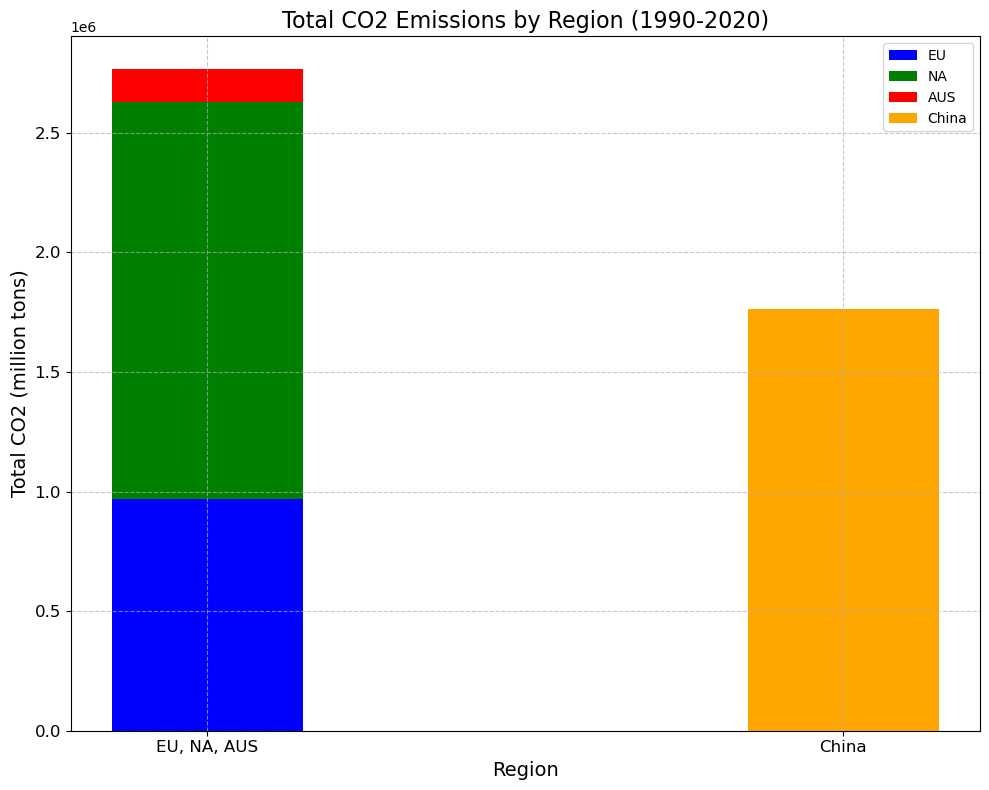

In [14]:
#CO2EmissionsHDI 
from matplotlib.colors import LinearSegmentedColormap

EU_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 
                'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 
                'SVN', 'ESP', 'SWE']

NA_countries = ['CAN', 'USA']
AUS_countries = ['AUS']
CHN_countries = ['CHN']

#Calculate total CO2 emissions for each region
# EU_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(EU_countries)][['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum().sum()
# NA_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(NA_countries)][['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum().sum()
# AUS_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(AUS_countries)][['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum().sum()
# CHN_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(CHN_countries)][['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum().sum()

EU_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(EU_countries)][['CO2 Total']].sum().sum()
NA_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(NA_countries)][['CO2 Total']].sum().sum()
AUS_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(AUS_countries)][['CO2 Total']].sum().sum()
CHN_CO2 = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(CHN_countries)][['CO2 Total']].sum().sum()


total_CO2 = [EU_CO2, NA_CO2, AUS_CO2, CHN_CO2]

# Define regions and their colors
regions = ['EU', 'NA', 'AUS', 'China']
colors = ['blue', 'green', 'red', 'orange']

total_CO2_stacked = [EU_CO2, NA_CO2, AUS_CO2]
CHN_CO2_separate = [CHN_CO2]
regions_stacked = ['EU, NA, AUS']
regions_separate = ['China']
colors_stacked = ['blue', 'green', 'red']
colors_separate = ['orange']

# Plot
plt.figure(figsize=(10, 8))

plt.bar(regions_stacked[0], total_CO2_stacked[0], color=colors_stacked[0], label='EU', width=0.3)
plt.bar(regions_stacked[0], total_CO2_stacked[1], bottom=total_CO2_stacked[0], color=colors_stacked[1], label='NA', width=0.3)
plt.bar(regions_stacked[0], total_CO2_stacked[2], bottom=total_CO2_stacked[0]+total_CO2_stacked[1], color=colors_stacked[2], label='AUS', width=0.3)

# Plotting separate bar for CHN
plt.bar(regions_separate[0], CHN_CO2_separate[0], color=colors_separate[0], label='China', width=0.3)

# Add title and labels
plt.title('Total CO2 Emissions by Region (1990-2020)', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total CO2 (million tons)', fontsize=14)

# Add legend
plt.legend()

# Beautify
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()




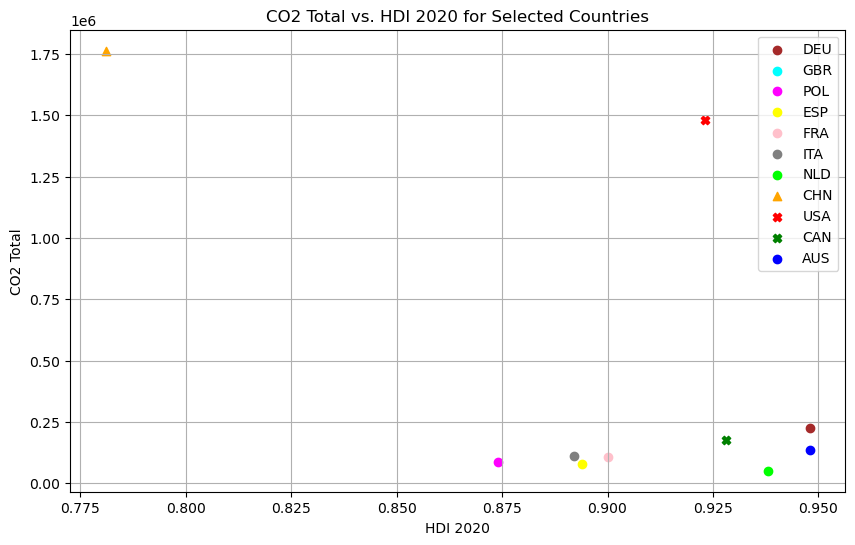

In [15]:
top_10_eu_countries = ['DEU', 'GBR', 'POL', 'ESP', 'FRA', 'ITA', 'NLD']

# Other countries
other_countries = ['CHN', 'USA', 'CAN', 'AUS']

# Define colors for each country
colors = {
    'DEU': 'brown',
    'GBR': 'cyan',
    'POL': 'magenta',
    'ESP': 'yellow',
    'FRA': 'pink',
    'ITA': 'gray',
    'NLD': 'lime',
    'CHN': 'orange',
    'USA': 'red',
    'CAN': 'green',
    'AUS': 'blue'
}

markers = {
    'DEU': 'o',
    'GBR': 'o',
    'POL': 'o',
    'ESP': 'o',
    'FRA': 'o',
    'ITA': 'o',
    'NLD': 'o',
    'CHN': '^',
    'USA': 'X',
    'CAN': 'X',
    'AUS': 'o'
}

# Filter dataframe to include only the top 10 EU countries and other selected countries
selected_countries_data = CO2EmissionsHDI[CO2EmissionsHDI['Country'].isin(top_10_eu_countries + other_countries)]

# Create scatter plot
plt.figure(figsize=(10, 6))
for country in top_10_eu_countries + other_countries:
    country_data = selected_countries_data[selected_countries_data['Country'] == country]
    plt.scatter(country_data['hdi_2020'], country_data['CO2 Total'], label=country, color=colors[country], marker=markers[country])  
    
    
# Plot settings
plt.xlabel('HDI 2020')
plt.ylabel('CO2 Total')
plt.title('CO2 Total vs. HDI 2020 for Selected Countries')
plt.legend()
plt.grid(True)
plt.show()


# Emissions per capita

In [16]:
# HDI = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv")
HDI = pd.read_csv('HDR23-24_Composite_indices_complete_time_series.csv', sep=',', encoding='latin-1')
# HDI

columns_to_keep = [
    col for col in HDI.columns 
    if col.startswith("pop_total_") or "iso3" in col
]

# Filter the DataFrame to keep only these columns
HDI_filtered = HDI[columns_to_keep]
# HDI_filtered

#renaming iso3 to country:
HDI_filtered.rename(columns={'iso3': 'Country'}, inplace = True )

#only keeping relevant columns:
HDI_filtered = HDI_filtered[HDI_filtered['Country'].isin(countries_to_keep)]
HDI_filtered

# #JOining both Dataframes:
CO2EmissionsHDI = VisualDatasetSimplifiedFiltered.join(HDI_filtered.set_index('Country'), on='Country')
CO2EmissionsHDI

for year in range(1990, 2021):
    # Create a new column for CO2 emissions per capita for each year
    CO2EmissionsHDI[f'CO2_per_capita_{year}'] = CO2EmissionsHDI[f'{year}'] / CO2EmissionsHDI[f'pop_total_{year}']

# If you want to calculate the average CO2 emissions per capita over the entire period:
# Create a new column for the average CO2 emissions per capita
CO2EmissionsHDI['avg_CO2_per_capita'] = CO2EmissionsHDI.filter(like='CO2_per_capita').mean(axis=1)

# If you want to calculate CO2 emissions per capita for a specific year (e.g., 2020):
# Calculate CO2 emissions per capita for 2020
CO2EmissionsHDI['CO2_per_capita_2020'] = CO2EmissionsHDI['2020'] / CO2EmissionsHDI['pop_total_2020']
CO2EmissionsHDI

C:\Users\Vasco\AppData\Local\Temp\ipykernel_10812\2536025093.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDI_filtered.rename(columns={'iso3': 'Country'}, inplace = True )


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,CO2_per_capita_2012,CO2_per_capita_2013,CO2_per_capita_2014,CO2_per_capita_2015,CO2_per_capita_2016,CO2_per_capita_2017,CO2_per_capita_2018,CO2_per_capita_2019,CO2_per_capita_2020,avg_CO2_per_capita
8,AUS,3744.726038,3754.685595,3770.201774,3794.892999,3843.552037,3919.065202,3947.896797,4024.159216,4231.504944,...,217.383808,191.305784,192.293582,190.194445,188.053168,196.766911,192.536143,186.104296,171.060880,213.977985
9,AUT,572.125832,606.290090,561.310641,561.412962,562.726620,585.792250,616.745831,610.460379,611.406131,...,76.195589,76.425409,72.360242,72.743087,72.390433,73.792423,70.889732,71.694668,65.653491,77.340792
12,BEL,1066.286763,1105.061899,1088.463080,1071.504592,1111.662875,1112.328683,1160.205073,1140.589236,1165.656115,...,87.351941,87.652465,82.268872,85.421197,85.597974,84.353296,85.604322,83.953702,76.486358,99.851357
16,BGR,700.600159,571.257885,530.088808,523.117444,493.892787,503.661336,507.846718,484.347219,458.389508,...,60.458200,55.426874,58.692219,62.071792,47.493361,50.498377,47.632756,46.029824,40.211809,55.942440
29,CAN,4495.668800,4462.602178,4579.012872,4548.401238,4688.957083,4806.634231,4961.512669,5068.413872,5170.362523,...,171.505008,172.453594,172.633756,170.699542,157.813510,159.458215,161.155391,155.673337,143.415550,176.467391
32,CHN,22824.110740,23939.860408,24915.445358,26675.587319,27858.437533,30936.455883,31008.445083,31085.618432,31971.399111,...,61.868253,64.177985,64.127205,62.996481,62.576773,63.553248,66.093202,66.994859,67.943336,42.584293
43,CYP,89.437168,93.951177,96.694954,98.516452,100.900786,101.259886,105.057118,107.059380,109.584815,...,112.952840,107.543427,109.309350,108.981043,111.687031,112.410158,111.828776,110.969453,103.531228,117.475224
44,CZE,1502.115385,1371.381866,1284.275242,1228.385560,1175.329677,1167.600568,1199.761731,1177.556263,1121.949878,...,99.891327,95.968411,93.850722,95.059771,95.534152,95.759700,95.014973,91.018411,83.520630,108.072126
45,DEU,8651.202977,8391.728206,8036.010476,7977.616049,7897.430763,7868.804145,8111.880967,7826.918150,7674.615914,...,82.610180,84.893676,80.671253,80.969607,81.128579,79.248613,76.313365,71.193668,65.030909,88.726236
48,DNK,536.340540,622.348270,574.238583,597.692347,629.271550,604.771186,712.699263,634.958987,603.270685,...,72.054035,73.932606,67.834151,64.620522,68.456448,64.794603,63.927826,58.891090,54.229144,94.718155


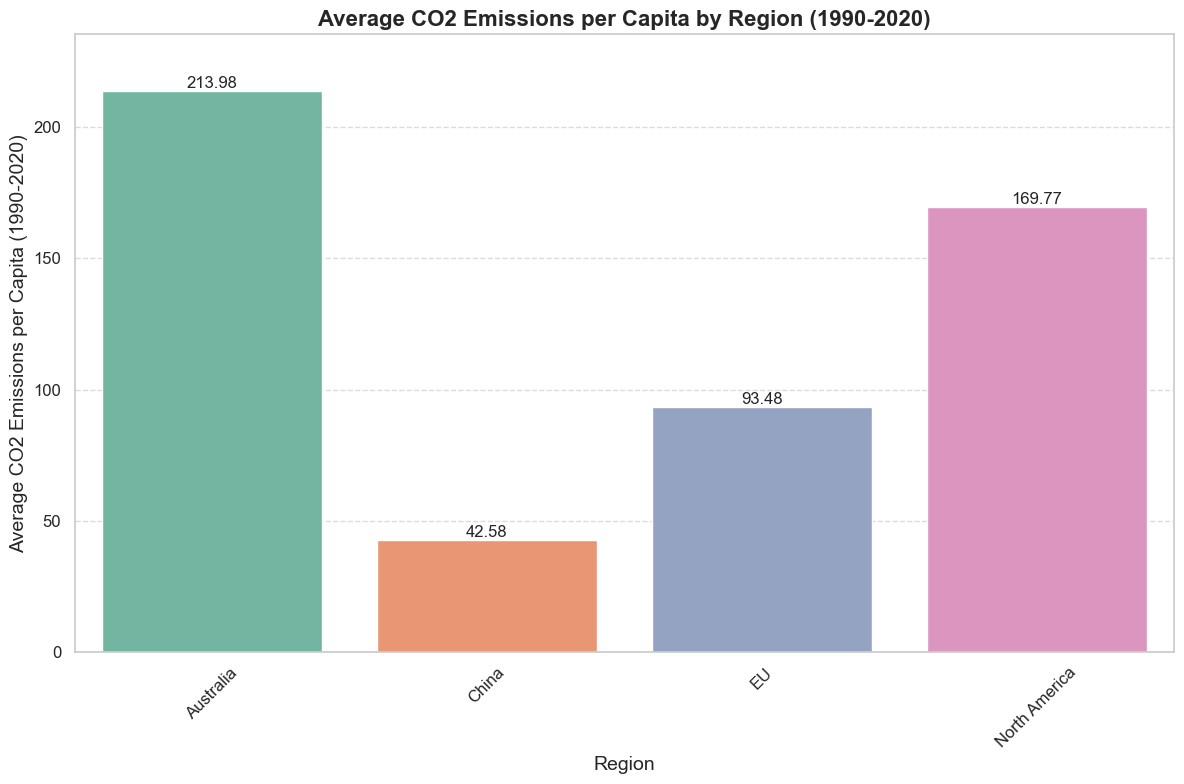

In [17]:
# Define regions and their countries
north_america_countries = ['USA', 'CAN']
eu_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']
australia_countries = ['AUS']
china_countries = ['CHN']

# Create a new column 'Region' based on the country
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(north_america_countries), 'Region'] = 'North America'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(eu_countries), 'Region'] = 'EU'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(australia_countries), 'Region'] = 'Australia'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(china_countries), 'Region'] = 'China'

# Calculate the average CO2 emissions per capita for each country over all years
co2_per_capita_columns = [col for col in CO2EmissionsHDI.columns if col.startswith('CO2_per_capita_')]

# Calculate the sum of CO2 emissions per capita for each region
region_sum_CO2_per_capita = CO2EmissionsHDI.groupby('Region')[co2_per_capita_columns].sum()

# Count the number of countries in each region
region_country_count = CO2EmissionsHDI.groupby('Region')['Country'].nunique()

# Calculate the average CO2 emissions per capita for each region
region_avg_CO2_per_capita = region_sum_CO2_per_capita.div(region_country_count, axis=0).mean(axis=1)

# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Plot the average CO2 emissions per capita for each region
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=region_avg_CO2_per_capita.index, y=region_avg_CO2_per_capita.values, palette=colors)

# Add value labels on top of the bars
for i in range(len(region_avg_CO2_per_capita)):
    bar_plot.text(i, region_avg_CO2_per_capita.values[i] + 0.01, round(region_avg_CO2_per_capita.values[i], 2), ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average CO2 Emissions per Capita (1990-2020)', fontsize=14)
plt.title('Average CO2 Emissions per Capita by Region (1990-2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(region_avg_CO2_per_capita.values) * 1.1)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

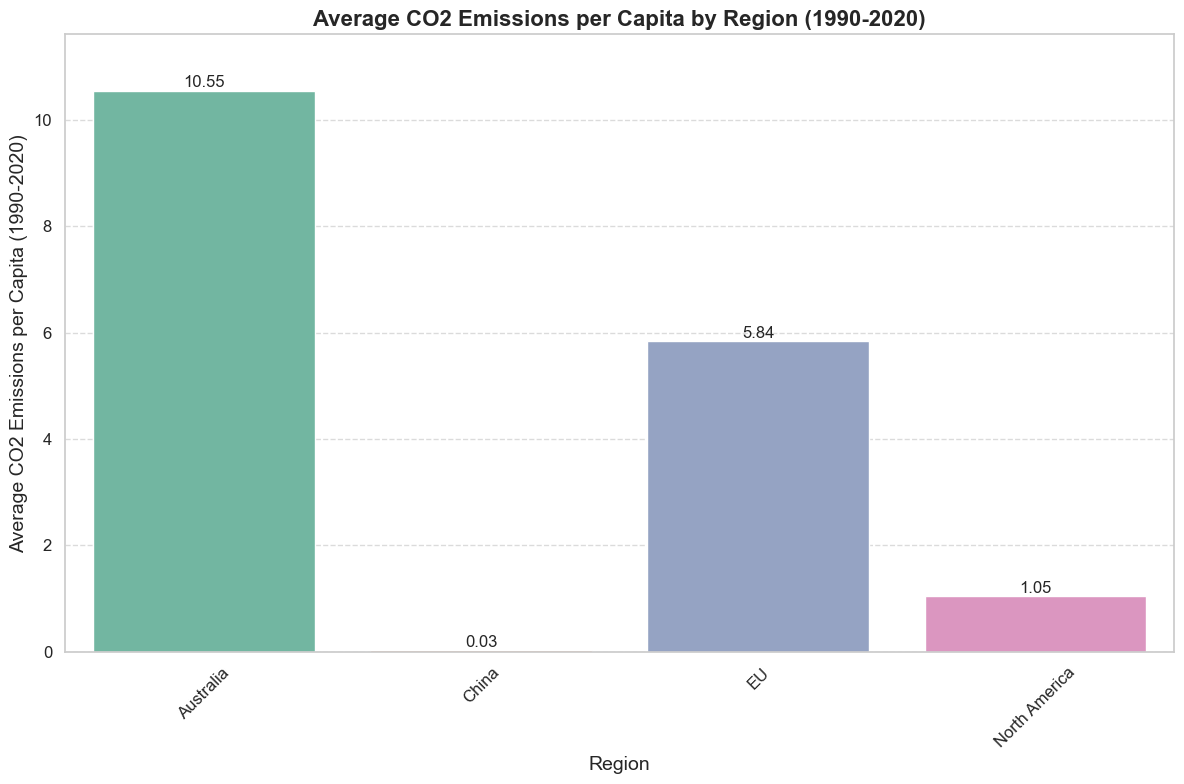

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define regions and their countries
north_america_countries = ['USA', 'CAN']
eu_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']
australia_countries = ['AUS']
china_countries = ['CHN']

# Create a new column 'Region' based on the country
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(north_america_countries), 'Region'] = 'North America'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(eu_countries), 'Region'] = 'EU'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(australia_countries), 'Region'] = 'Australia'
CO2EmissionsHDI.loc[CO2EmissionsHDI['Country'].isin(china_countries), 'Region'] = 'China'

# Filter the CO2 and population columns to include only years 1990 to 2020
co2_per_capita_columns = [f'CO2_per_capita_{year}' for year in range(1990, 2021)]
population_columns = [f'pop_total_{year}' for year in range(1990, 2021)]

# Calculate the total CO2 emissions and population for each region
region_co2 = CO2EmissionsHDI.groupby('Region')[co2_per_capita_columns].sum()
region_population = CO2EmissionsHDI.groupby('Region')[population_columns].sum()

# Calculate the CO2 emissions per capita for each region
region_co2_per_capita = region_co2.div(region_population.values, axis=0)

# Calculate the average CO2 emissions per capita over all years
region_avg_CO2_per_capita = region_co2_per_capita.mean(axis=1)

# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Plot the average CO2 emissions per capita for each region
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=region_avg_CO2_per_capita.index, y=region_avg_CO2_per_capita.values, palette=colors)

# Add value labels on top of the bars
for i in range(len(region_avg_CO2_per_capita)):
    bar_plot.text(i, region_avg_CO2_per_capita.values[i] + 0.01, round(region_avg_CO2_per_capita.values[i], 2), ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average CO2 Emissions per Capita (1990-2020)', fontsize=14)
plt.title('Average CO2 Emissions per Capita by Region (1990-2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(region_avg_CO2_per_capita.values) * 1.1)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


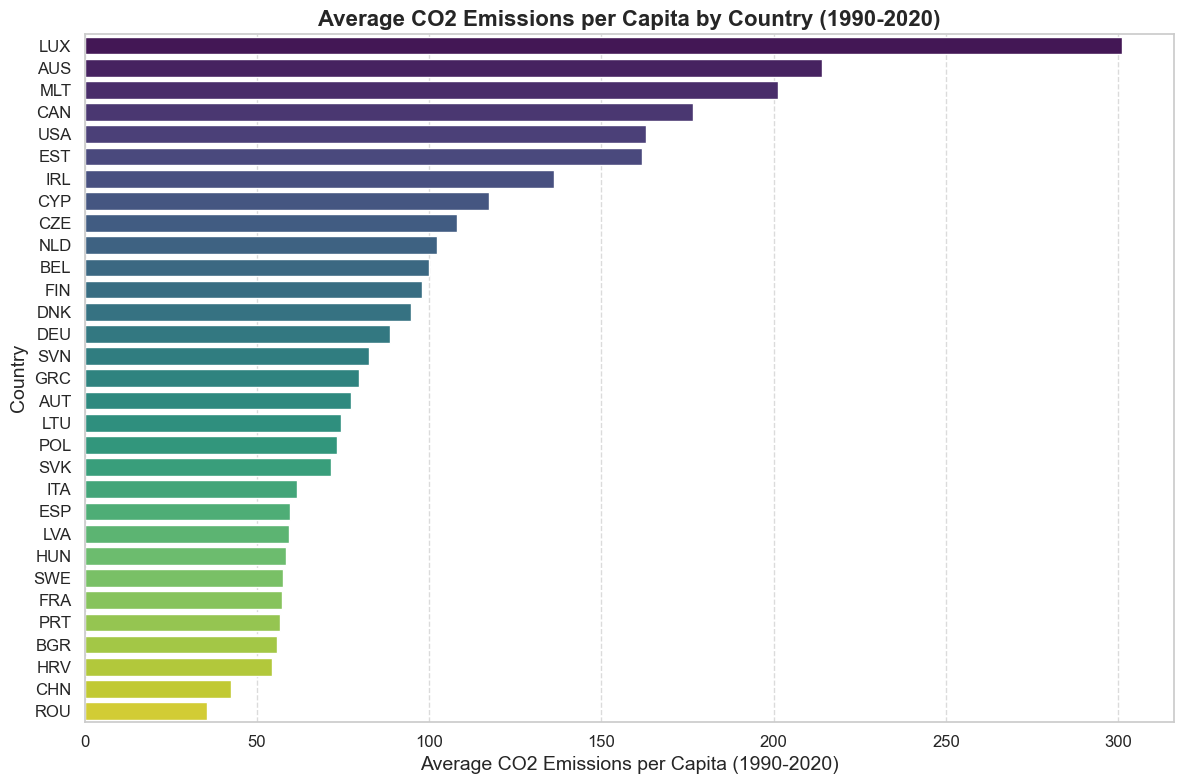

In [19]:
# Calculate the CO2 emissions per capita for each year
for year in range(1990, 2021):
    CO2EmissionsHDI[f'CO2_per_capita_{year}'] = CO2EmissionsHDI[f'{year}'] / CO2EmissionsHDI[f'pop_total_{year}']

# Calculate the average CO2 emissions per capita for each country
co2_per_capita_columns = [col for col in CO2EmissionsHDI.columns if col.startswith('CO2_per_capita_')]
CO2EmissionsHDI['avg_CO2_per_capita'] = CO2EmissionsHDI[co2_per_capita_columns].mean(axis=1)

# Sort countries by average CO2 per capita
CO2EmissionsHDI_sorted = CO2EmissionsHDI.sort_values(by='avg_CO2_per_capita', ascending=False)

# Plot the average CO2 emissions per capita for each country
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_CO2_per_capita', y='Country', data=CO2EmissionsHDI_sorted, palette="viridis")

# Customize the plot
plt.xlabel('Average CO2 Emissions per Capita (1990-2020)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Average CO2 Emissions per Capita by Country (1990-2020)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Some more extra work ! hopefully this will also give me some extra points !

### Global warming potential measures how much a gas affects the atmosphere. CO2 is the basis and has an GWP of 1, while methane has a GWP of 30. It means that methane absorbs 30 times more heat in the atmosphere than CO2. It is basically a way to make all atmosphere affecting gases into one scale to they are easier to compare.

In [20]:
#Lets group everything now by sector
# VisualDatasetGases = VisualDataset.groupby(['Gas', 'Sector'], dropna = True).sum()
# VisualDatasetGases = VisualDatasetGases.rename_axis('Gas').reset_index()
VisualDataset

#i have to transform the CH4, F-Gas and N20 into CO2 equivalents. for this i simply multiply:
#CO2 - 1
#CH4 - 30
#N20 - 265
#F-gas - difficult to say since they vary a lot, could try the average though
# Lookg at this link: https://climate.ec.europa.eu/eu-action/fluorinated-greenhouse-gases/about-f-gases_en 
#the most commom emitted Gases in the EU are  HFC and NF3 (appear to be 90%). assuming the rest of the world has a simillar distribution, we can 
#give the F-Gas category the average between those two. Of course an weighted average would be even better but the page
# does not disclose the actual percentage values of those...lets assume normal average
#(values taken from https://www.statista.com/statistics/1085616/global-warming-potential-fluorinated-gases/ )
#F-Gas (assuming HFC and NF3) = 16000

#droping the Total excluding and total including:
filtered_df = VisualDataset[~VisualDataset['Sector'].isin(['Total excluding LUCF', 'Total including LUCF'])]
filtered_df = VisualDataset[~VisualDataset['Gas'].isin(['All GHG'])]
# filtered_df

#there used to be 14 sectors, now only 12 after this removal, Now lets group by sector and gas
grouped_df = filtered_df.groupby(['Sector', 'Gas']).sum().reset_index()
# grouped_df

#Done. deleting unnecessary columns
del grouped_df['Country']
del grouped_df['Source']

#Now the multplying by the correct values
CH4 = 30
N20 = 265
FGas = 1600

year_columns = grouped_df.columns[2:]

grouped_df.loc[grouped_df['Gas'] == "CH4", year_columns] *= CH4
grouped_df.loc[grouped_df['Gas'] == "N20", year_columns] *= N20
grouped_df.loc[grouped_df['Gas'] == "F-Gas", year_columns] *= FGas
grouped_df

,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Agriculture,CH4,2.028031e+05,1.982106e+05,1.969055e+05,1.956154e+05,1.968904e+05,1.977457e+05,1.974675e+05,1.947403e+05,...,2.113764e+05,2.122988e+05,2.101622e+05,2.114893e+05,2.124701e+05,2.137647e+05,2.160103e+05,2.167216e+05,2.161864e+05,2.183679e+05
1,Agriculture,N2O,3.994291e+03,3.820174e+03,3.797418e+03,3.763849e+03,3.801248e+03,3.875894e+03,3.942117e+03,3.890308e+03,...,4.592757e+03,4.606746e+03,4.559724e+03,4.621708e+03,4.640195e+03,4.668453e+03,4.774620e+03,4.741576e+03,4.747535e+03,4.837039e+03
2,Building,CH4,2.789492e+04,2.649073e+04,2.476712e+04,2.525013e+04,2.497691e+04,2.390604e+04,2.380388e+04,2.424206e+04,...,2.059911e+04,1.867964e+04,1.875355e+04,1.867530e+04,1.850047e+04,1.841051e+04,1.859350e+04,1.856231e+04,1.842964e+04,1.817396e+04
3,Building,CO2,6.210957e+03,6.242163e+03,5.931627e+03,6.055023e+03,5.852994e+03,5.972816e+03,6.162577e+03,6.084510e+03,...,5.968644e+03,5.804844e+03,6.040457e+03,5.862676e+03,5.939500e+03,6.031226e+03,6.159544e+03,6.215542e+03,6.088329e+03,5.958433e+03
4,Building,N2O,4.999653e+02,4.531134e+02,4.020921e+02,4.052864e+02,4.066269e+02,3.665133e+02,3.716506e+02,3.793524e+02,...,2.694475e+02,2.057881e+02,2.077601e+02,2.080052e+02,2.068701e+02,2.074415e+02,2.099164e+02,2.126743e+02,2.126401e+02,2.057836e+02
5,Bunker Fuels,CH4,1.282440e+04,1.140121e+04,9.899711e+03,9.921630e+03,9.990856e+03,8.763638e+03,8.903861e+03,9.127794e+03,...,5.898751e+03,3.992586e+03,4.043369e+03,4.077804e+03,4.075868e+03,4.115698e+03,4.179483e+03,4.271763e+03,4.275787e+03,4.066154e+03
6,Bunker Fuels,CO2,1.816365e+03,1.783779e+03,1.807606e+03,1.794380e+03,1.847419e+03,1.857620e+03,1.909761e+03,1.977283e+03,...,2.633772e+03,2.472307e+03,2.477519e+03,2.551934e+03,2.662378e+03,2.748069e+03,2.875110e+03,2.944613e+03,2.938743e+03,2.104367e+03
7,Bunker Fuels,N2O,4.366006e+02,3.892006e+02,3.396059e+02,3.402892e+02,3.429513e+02,3.023871e+02,3.073896e+02,3.152674e+02,...,2.126818e+02,1.486030e+02,1.503595e+02,1.520082e+02,1.527340e+02,1.546522e+02,1.576679e+02,1.612592e+02,1.614356e+02,1.480387e+02
8,Electricity/Heat,CH4,1.312606e+04,1.170732e+04,1.021220e+04,1.023307e+04,1.030887e+04,9.082541e+03,9.233564e+03,9.470538e+03,...,6.385651e+03,4.519146e+03,4.591004e+03,4.634172e+03,4.634798e+03,4.708636e+03,4.794999e+03,4.914105e+03,4.941253e+03,4.739417e+03
9,Electricity/Heat,CO2,1.902336e+04,1.923974e+04,1.946904e+04,1.950366e+04,1.970776e+04,2.004828e+04,2.079214e+04,2.129530e+04,...,3.081996e+04,3.133107e+04,3.180826e+04,3.161791e+04,3.112335e+04,3.111532e+04,3.179365e+04,3.263337e+04,3.240073e+04,3.099827e+04


In [21]:
#Now the actual plotting

year_columns = [str(year) for year in range(1990, 2021)]

# Summing emissions over the years for each sector and gas
grouped_df['Total_CO2'] = grouped_df[year_columns].sum(axis=1)

# Grouping by Sector and Gas and summing the total CO2
grouped_df = grouped_df.groupby(['Sector', 'Gas'])['Total_CO2'].sum().reset_index()




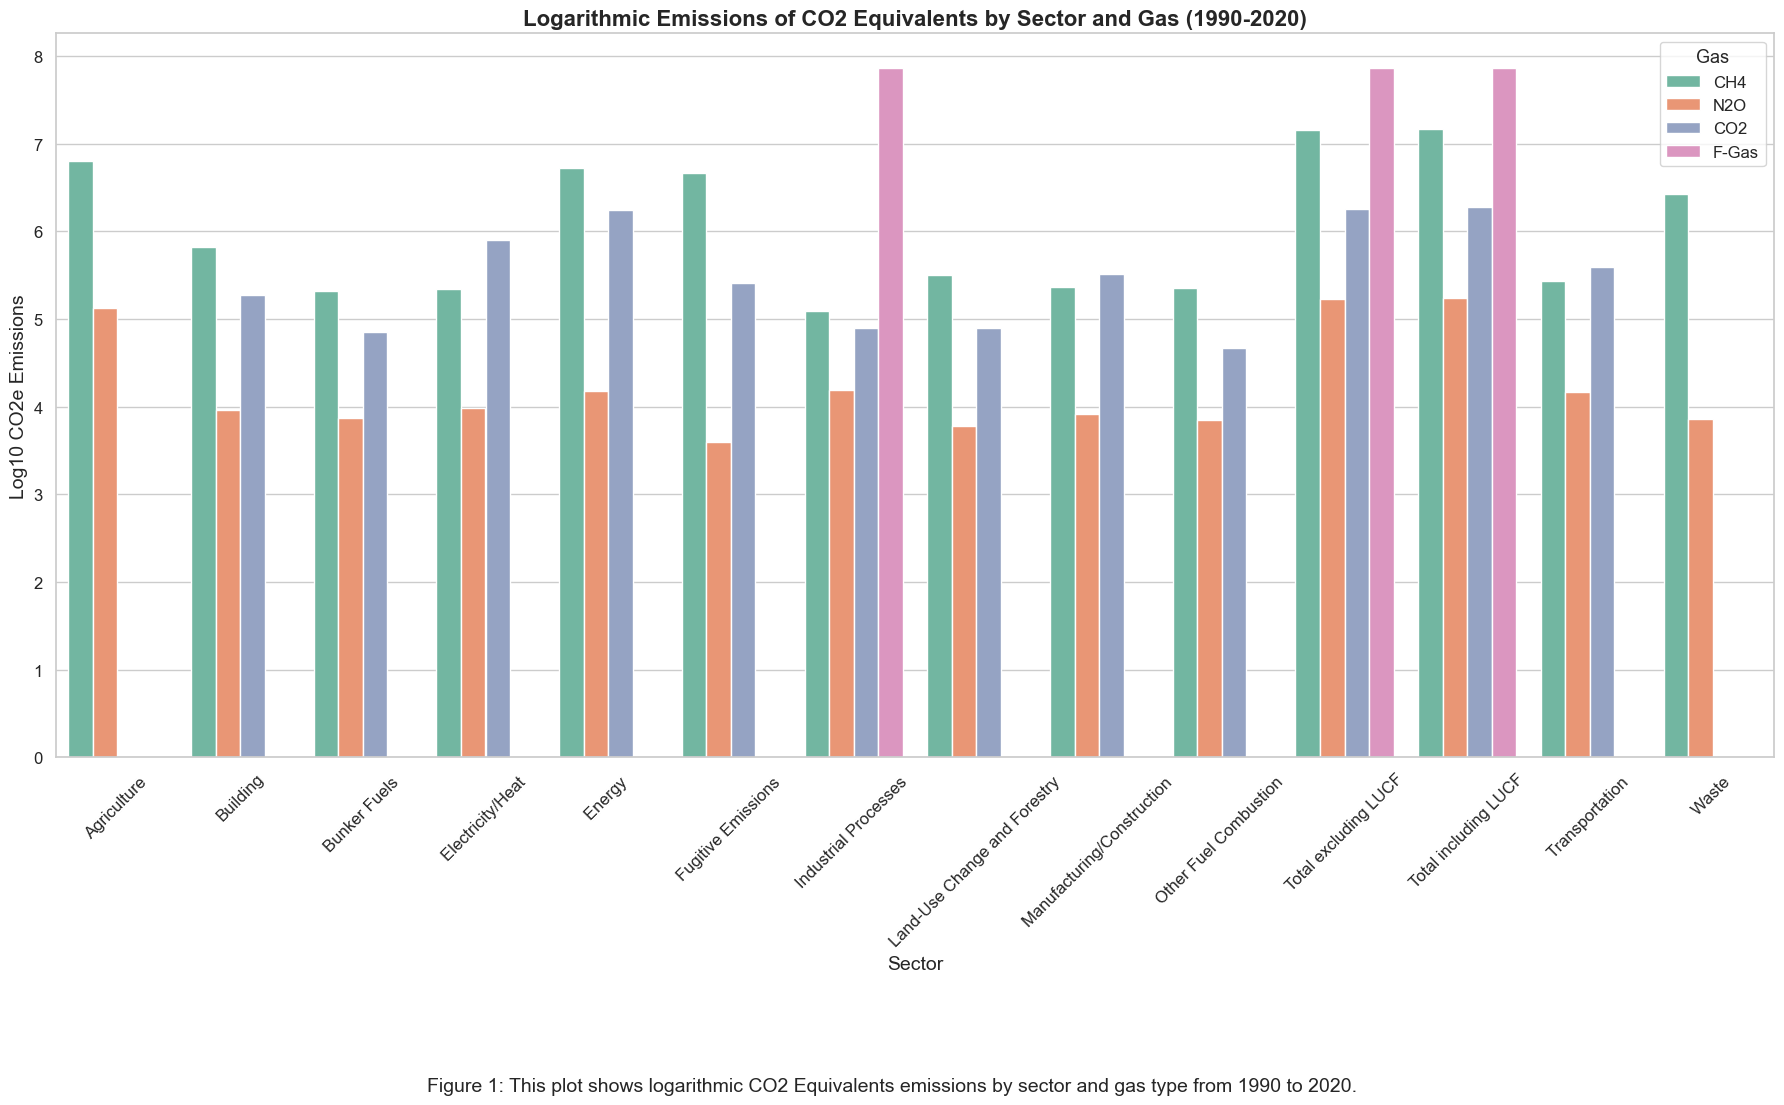

In [22]:
# part 2
# Apply logarithmic scale to the Total_CO2 values to compress the range
grouped_df['Log_Total_CO2'] = np.log10(grouped_df['Total_CO2'])

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(18, 10))
bar_plot = sns.barplot(x='Sector', y='Log_Total_CO2', hue='Gas', data=grouped_df, palette='Set2')

# Customize the plot
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Log10 CO2e Emissions', fontsize=14)
plt.title('Logarithmic Emissions of CO2 Equivalents by Sector and Gas (1990-2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Gas', title_fontsize='13', fontsize='12', loc='upper right')
# Add a caption
plt.figtext(0.5, -0.1, 'Figure 1: This plot shows logarithmic CO2 Equivalents emissions by sector and gas type from 1990 to 2020.', ha='center', fontsize=14)



# Show the plot
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Now we group the dataset together so that each country only has one row.
Of course we summ all the values from the columns so we get a total from every
source from a specific year, e.g. from libia in the year 1990 we get a total
of all from all the sources

There is also no need for converting the dataset into a long format because after the grouping it will look the same

### We can also group the dataset By sectors so we can make a pie chart later

In [23]:
#Lets group everything now by sector
VisualDatasetSectors = VisualDataset.groupby(['Sector'], dropna = True).sum()
VisualDatasetSectors = VisualDatasetSectors.rename_axis('Sector').reset_index()
VisualDatasetSectors

,Sector,Country,Source,Gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Agriculture,AFGAFGAFGAGOAGOAGOALBALBALBANDANDANDAREAREAREA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCH4N2OAll GHGCH4N2OAll GHGCH4N2OAll GHG...,21366.731975,20854.283027,20721.871039,20568.723231,20728.525271,20934.834806,...,23277.275535,23366.743987,23130.260087,23342.703957,23445.063269,23587.884682,23949.927292,23931.257555,23907.498050,24231.936619
1,Building,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,14430.503553,14400.605788,13662.944066,13946.749215,13522.650794,13692.625834,...,13463.009503,13006.757230,13483.417913,13121.052791,13261.172907,13437.289296,13707.071562,13816.411063,13552.696881,13275.319705
2,Bunker Fuels,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,4509.889153,4350.045388,4298.767866,4273.568815,4385.080994,4324.488234,...,5699.708903,5248.175230,5262.062313,5414.407591,5637.017907,5812.408896,6072.772762,6219.020263,6207.525081,4511.177505
3,Electricity/Heat,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,39053.598353,39393.474188,39755.442666,39826.374815,40242.204794,40844.674034,...,62292.990503,63196.808030,64162.979513,63784.827791,62790.557907,62781.377496,64151.765362,65847.397863,65382.213881,62554.163705
4,Energy,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,98373.487815,98781.527989,98116.441109,98557.732094,98881.226394,101545.846177,...,144142.481694,145693.444199,148057.499649,148117.928025,147547.485355,147486.537663,149681.024522,153113.877433,152494.315496,144231.457763
5,Fugitive Emissions,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,16393.651645,16343.064046,16062.664348,15647.791116,15672.217436,16177.277322,...,21571.784860,21754.419733,21540.384909,21741.616637,21704.173244,21518.301035,21873.912519,22453.254778,22671.516490,21471.169567
6,Industrial Processes,AFGAFGAFGAFGAFGAGOAGOAGOAGOAGOALBALBALBALBALBA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OF-GasAll GHGCO2CH4N2OF-GasAll ...,6098.473521,6143.840843,5146.270334,5159.768207,5576.097069,5896.663564,...,10323.172558,10652.080082,11105.264664,11612.944684,11575.838550,11969.599649,12241.173193,12676.700920,13051.453743,13259.064547
7,Land-Use Change and Forestry,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,8265.223819,7697.830857,7697.654648,7699.312088,7697.900275,7720.986712,...,1144.221937,1257.378977,1063.720291,2460.024083,2674.642476,5277.302749,5086.664608,5728.620165,6828.715401,5234.179543
8,Manufacturing/Construction,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,18898.990753,18270.563388,17420.949866,17188.395215,17294.893194,18071.629034,...,26906.512503,26713.132830,26811.428113,27066.126591,26500.549707,25886.793896,25643.551162,26230.892463,26223.452481,26051.822705
9,Other Fuel Combustion,AFGAFGAFGAFGAGOAGOAGOAGOALBALBALBALBANDANDANDA...,Climate WatchClimate WatchClimate WatchClimate...,All GHGCO2CH4N2OAll GHGCO2CH4N2OAll GHGCO2CH4N...,4964.646953,4781.022388,4229.061666,4286.385615,4179.957394,3818.789234,...,3376.134703,3212.279430,3250.923313,3230.295591,3224.439507,3202.331096,3220.838962,3187.499263,3078.093481,2982.559705


### Lets also group everything by Gas type


In [24]:
#Lets group everything now by sector
VisualDatasetGases = VisualDataset.groupby(['Gas'], dropna = True).sum()
VisualDatasetGases = VisualDatasetGases.rename_axis('Gas').reset_index()
VisualDatasetGases

,Gas,Country,Source,Sector,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All GHG,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAGOA...,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,255339.886482,255738.848724,254410.388861,255303.237684,257100.958439,263069.602390,...,352215.013478,355623.718701,360524.923622,363369.977303,362823.214152,366290.118098,371704.460314,380046.701098,380562.467423,362521.088437
1,CH4,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAGOA...,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFEnergy Electricity/Heat Bu...,49969.911361,49620.087793,48958.101512,49157.068974,49377.000439,49768.392996,...,57313.126908,57444.951463,57392.814923,58217.088454,58459.331383,57921.409638,58562.239617,59587.945975,60279.466615,58716.586249
2,CO2,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAGOAGOAGOA...,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFEnergy Electricity/Heat Bu...,199637.734004,200008.639410,197735.104995,198007.803967,198950.037886,203952.352472,...,281037.013991,283533.115956,288020.762899,289489.557155,288281.736610,291770.288612,296195.376462,303566.545570,303021.948632,285738.155584
3,F-Gas,AFGAFGAFGAGOAGOAGOALBALBALBANDANDANDAREAREAREA...,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFIndustrial Processes Total...,2215.995109,2180.322291,2160.303012,2148.027540,2203.778354,2410.392079,...,5545.757213,5848.125809,6148.292261,6481.524054,6696.085863,7019.424486,7252.461265,7488.646993,7716.260457,7923.548480
4,N2O,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAGOA...,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFEnergy Electricity/Heat Bu...,18330.255168,17632.374069,17264.677660,17162.934643,17724.810812,17809.107842,...,19783.733465,19514.950899,19427.359261,19728.689864,19917.074850,20074.988795,20483.175875,20434.491410,20590.689674,20665.069590


### Add an Average column to the dataframe

In [25]:
#Let's create a column average for each country based on all the years.
#Of course, because the first few columns of the dataset are strings,
#I have to explicitely tell python to only count from coulumn 4 onwards
VisualDatasetSimplified['Average Per Country'] = VisualDatasetSimplified.iloc[:, 4:34].mean(axis=1)
VisualDatasetSimplified.head()

#make columns for the highest/lowest value in the row

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average Per Country
0,AFG,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,All GHGAll GHGAll GHGAll GHGAll GHGAll GHGAll ...,112.111971,113.409430,109.970015,110.788853,111.282549,114.869771,...,273.623361,270.073875,275.177143,279.544793,275.628714,283.733180,292.091168,293.434171,275.677988,187.554718
1,AGO,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,All GHGAll GHGAll GHGAll GHGAll GHGAll GHGAll ...,387.475882,390.429163,396.589866,420.543902,445.013402,470.111855,...,765.829236,785.814393,801.392212,843.654691,823.494309,798.395775,721.093935,759.825722,688.538454,631.763608
2,ALB,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,All GHGAll GHGAll GHGAll GHGAll GHGAll GHGAll ...,127.530037,109.460730,93.243254,92.714474,97.898289,97.498925,...,123.362573,126.035246,130.078938,127.369834,128.937711,135.756282,135.717056,132.392216,122.339607,114.302750
3,AND,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,All GHGAll GHGAll GHGAll GHGAll GHGAll GHGAll ...,1184.531548,1183.836971,1173.384891,1176.230082,1184.265260,1210.596419,...,1627.447234,1648.863879,1661.764150,1659.295084,1674.851653,1699.861998,1738.127181,1740.410796,1657.906396,1431.976380
4,ARE,Climate WatchClimate WatchClimate WatchClimate...,Total excluding LUCFTotal including LUCFEnergy...,All GHGAll GHGAll GHGAll GHGAll GHGAll GHGAll ...,677.300233,766.250275,749.058214,783.732699,858.492827,897.203488,...,1883.833836,1978.196508,2001.878177,2116.851871,2183.667005,2102.932543,1963.384642,2076.953175,2066.551097,1381.890723


# Visualizations 

### Bar Plot and or trendline


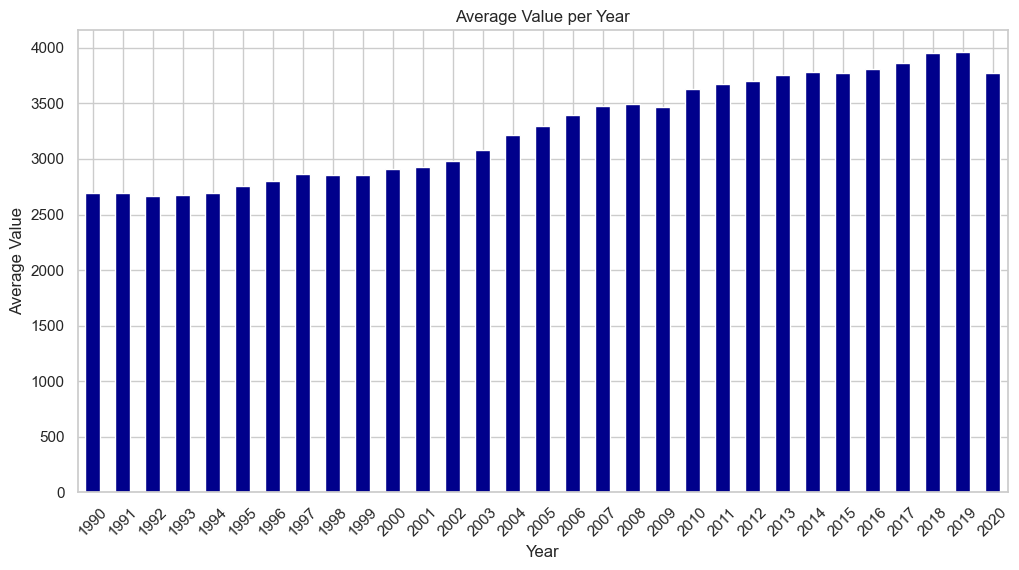

In [26]:
#find the average by year and plot it. the final bar chart should have 30 bars

#from 1990 to 2020, do not include the average column!
averagePerYear = VisualDatasetSimplified.iloc[:, 4:35].mean()
averagePerYear

plt.figure(figsize=(12, 6))
averagePerYear.plot(kind='bar', color = 'darkblue')
plt.title('Average Value per Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
# plt.show()
plt.savefig("AverageValuePerYear.png")

### Add a line graph with a different colour for each continent

EUU not found in ISO3
WORLD not found in regex


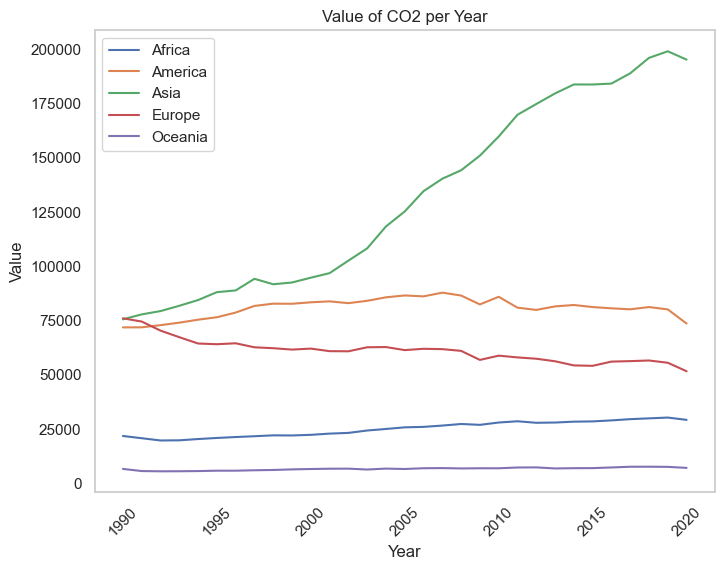

In [27]:
#Starting the country converter
cc = coco.CountryConverter()
continent_mapping = cc.convert(names=VisualDatasetSimplified['Country'], to='continent')

#just making a copy of the old dataframe
VisualDatasetContinent = VisualDatasetSimplified

VisualDatasetContinent['Continent'] = continent_mapping

#Grouping by continent so its easier to plot
VisualDatasetContinent = VisualDatasetContinent.groupby(['Continent'], dropna = True).sum()
VisualDatasetContinent = VisualDatasetContinent.rename_axis('Continent').reset_index()
VisualDatasetContinent

#Plotting
plt.figure(figsize=(8, 6))

#In this case, the average value of each column is the value in each column
#since we only have one row
for i in range(5):
    averageContinent = VisualDatasetContinent.iloc[[i], 5:36].mean()
    averageContinent.plot(kind='line')

plt.legend(["Africa", "America", "Asia", "Europe", "Oceania"], loc="upper left")
plt.grid()
plt.title('Value of CO2 per Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
# plt.show()
plt.savefig("CO2PerYear.png")




### After seeing the average for the whole world to increase, one might think the whole world was emtting more, but as it turns out, if we divide it further by continents, we realize that it's mostly Asia's fault

### Stacked Area Graph

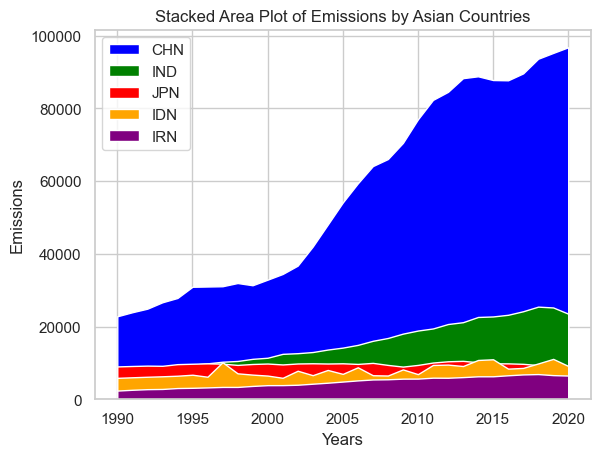

In [28]:
#Lets get just the asian countries
VisualDatasetCountriesInAsia = VisualDatasetSimplified[VisualDatasetSimplified.Continent == 'Asia']
# VisualDatasetCountriesInAsia

#Now i want to only see the 10 biggest countries.
#For this i will assume the 10 countries with the highest emissions for the 
#past 30 years are also the ones with the highest average overall
BiggestAsianEmiters = VisualDatasetCountriesInAsia.nlargest(5, 'Average Per Country')
BiggestAsianEmiters

#Now we define the x axis
years  = np.arange(1990, 2021, 1, dtype=int)
# years

#Now we define the colors
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(0, len(BiggestAsianEmiters)):
    dataCountry = BiggestAsianEmiters.iloc[[i], 4:35].values.tolist()
    plt.stackplot(years, dataCountry[0], labels=[BiggestAsianEmiters['Country'].iloc[i]], colors=[colors[i]])
#     plt.fill_between(years, 0, dataCountry[0], color=colors[i], alpha=0.7, edgecolor='black')  # Fill between the line and x-axis with black outline

plt.xlabel('Years')
plt.ylabel('Emissions')
plt.title('Stacked Area Plot of Emissions by Asian Countries')
plt.legend(BiggestAsianEmiters['Country'].tolist(), loc='upper left')
# plt.grid()
# plt.show()
plt.savefig("SackedAreaPlot.png")

#stacked area plot with year on the botton, and emissions on the y axis.
#the lines should be each country in asia, or the top 10 biggest ones


### Get a new dataset with the population and correlate this to emissions (scatter plot?)

### Scatter plot between emissions and another numerical data to see if there is a correlation between them! 

### Pie chart with the different sectors and their percentage for the overall emissions

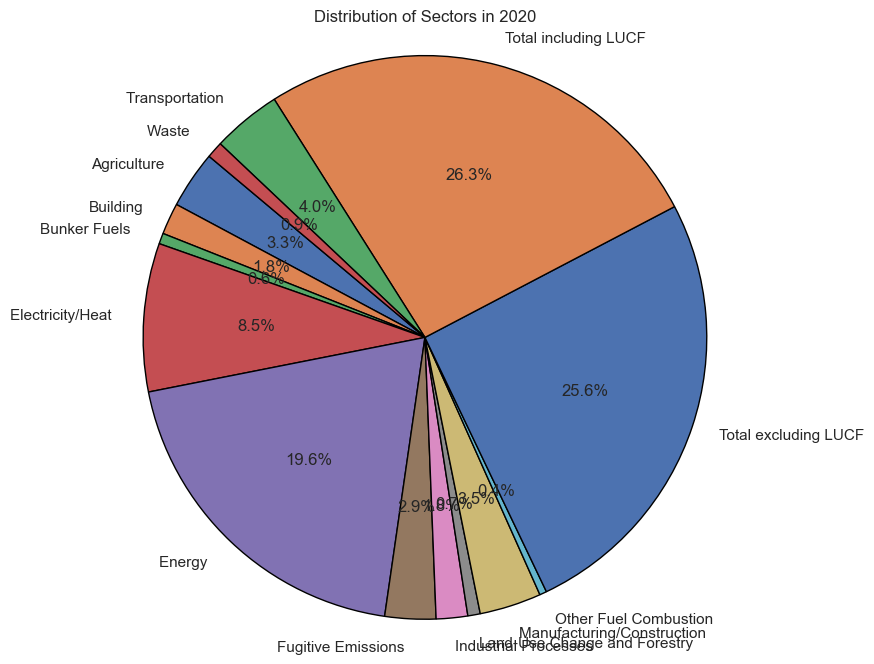

In [29]:
VisualDatasetSectors

sector_names = VisualDatasetSectors['Sector']
sector_values = VisualDatasetSectors['2020']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_values, labels=sector_names, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Sectors in 2020')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Pie chart with the Gases

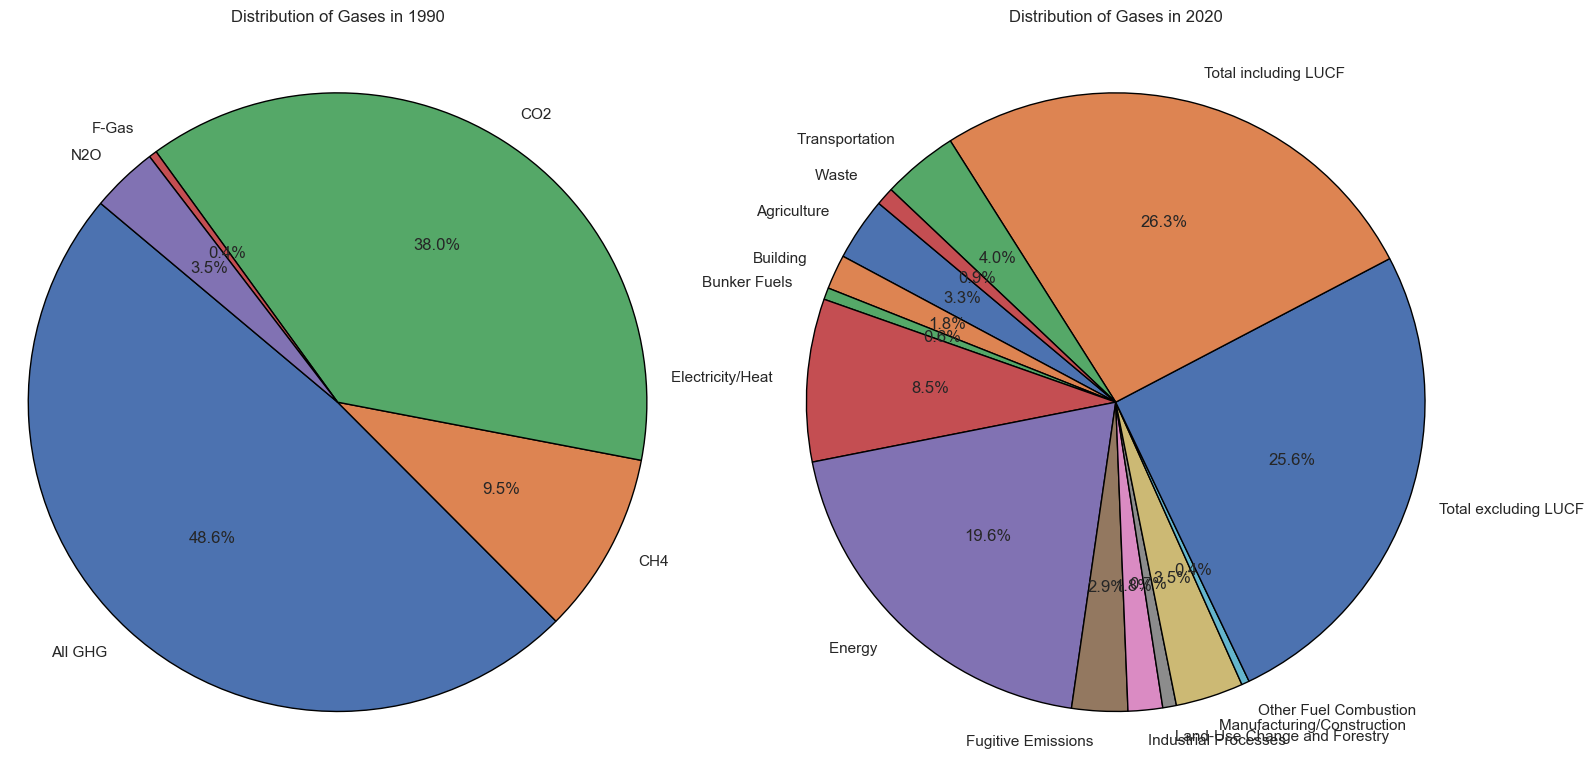

In [30]:
VisualDatasetGases

sector_names_1990 = VisualDatasetGases['Gas']
sector_values_1990 = VisualDatasetGases['1990']

plt.figure(figsize=(16, 8))

# Subplot for the pie chart of 2020
plt.subplot(1, 2, 2)
plt.pie(sector_values, labels=sector_names, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Gases in 2020')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Subplot for the pie chart of 1990
plt.subplot(1, 2, 1)
plt.pie(sector_values_1990, labels=sector_names_1990, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Gases in 1990')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Save the figure
plt.savefig("PieCharts.png")

# Display the plot
# plt.show()
plt.savefig("BarCharDistroGas2020.png")


Make a heatmap. On the y axis you have the sectors and the x axis you have the Gases. Then the redder smething is means that this sepcific sector uses more of this GAS ! brilliant. For one specific year


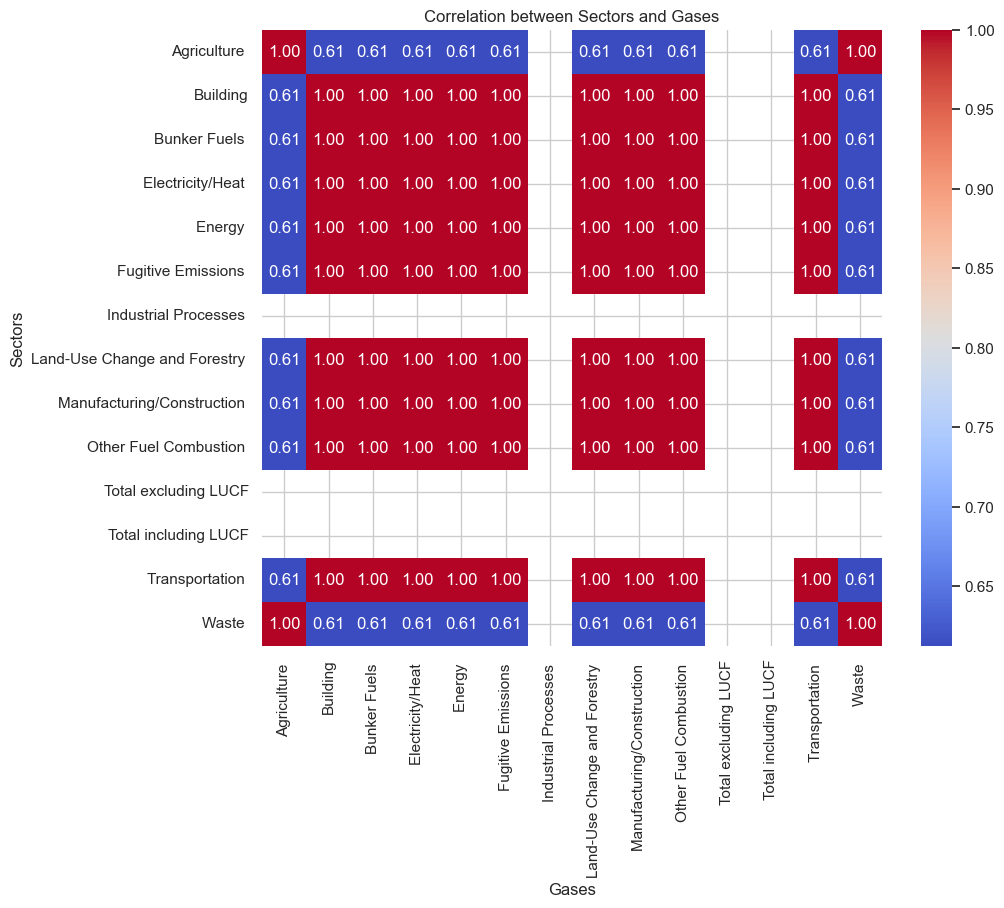

In [31]:
#make the heatmap
#DOES NOT LOOK GOOD NVM, better have 4 good graphs that you can exaplain that a complicated
#thing you cant explain!

sectorsAndGases = VisualDataset[['Sector', 'Gas']]
# sectorsAndGases
pivot_df = sectorsAndGases.pivot_table(index='Gas', columns='Sector', aggfunc=len, fill_value=0)
# # pivot_df = df.pivot_table(index='Sector', columns='Gas', values='Average per country', aggfunc='mean')
pivot_df

correlationMatrix = pivot_df.corr()
correlationMatrix


plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Sectors and Gases')
plt.xlabel('Gases')
plt.ylabel('Sectors')
plt.show()




# Exercise 2

In [32]:
correlationDataset = pd.read_csv('correlation-dataset.csv')
correlationDataset

upperOriginal = correlationDataset.where(np.triu(np.ones(correlationDataset.shape), k=1).astype(bool))
upperOriginal

,Unnamed: 0,Cuxhaven,Neu Isenburg,Herzberg,Hohenstein-Ernstthal,Kissing,Numbrecht,Diepholz,Meschede,Efringen-Kirchen,...,Stadthagen,Seesen,Hettstedt,Ladenburg,Taunusstein,Heubach,Tutzing,Kressbronn am Bodensee,Wernau,Karben
0,NaN,-0.139827,-0.180377,0.175301,0.105883,-0.117449,0.051334,-0.107046,0.107881,-0.002137,...,-0.177599,0.218184,-0.029139,-0.385888,-0.142147,-0.101327,-0.027896,-0.158956,-0.117532,0.060412
1,NaN,NaN,0.076043,-0.161674,0.055515,0.067604,0.139018,0.055409,-0.068276,-0.197195,...,0.016160,-0.193038,0.140127,-0.051024,-0.104759,-0.016154,-0.005026,0.043478,0.140286,0.043079
2,NaN,NaN,NaN,-0.087030,-0.047886,0.063964,0.015401,-0.062420,0.067226,-0.101499,...,-0.030208,0.026881,-0.147025,0.028317,-0.123975,-0.001091,0.192992,-0.205431,0.000475,0.047135
3,NaN,NaN,NaN,NaN,-0.037349,0.035690,0.098598,0.011115,0.269810,0.155619,...,-0.031616,-0.147849,-0.045509,-0.044280,-0.110007,0.051823,0.062621,-0.001972,0.035324,-0.067841
4,NaN,NaN,NaN,NaN,NaN,0.189933,-0.008020,0.023606,0.126200,0.105683,...,-0.153752,-0.008557,-0.188891,-0.038837,-0.127896,0.277049,-0.194403,-0.005713,0.027743,0.014873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.041920,-0.153000,0.033784,0.001244,0.000899,0.115116
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.090849,-0.990213,0.089007,-0.217248,-0.072362
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.113277,0.087037,-0.106444,0.008988
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.157548,0.161754,-0.076592


### Using Pearson's Correlation to check which variables might have a relationship. Linear

In [33]:
#calculating the pearsons correlation, to try to reduce the number of possible
#correlation to a few only

#using absolute values to make sure we dont accidentaly eliminate high negative values
correlation_matrix = correlationDataset.corr()
correlation_matrix

,Unnamed: 0,Cuxhaven,Neu Isenburg,Herzberg,Hohenstein-Ernstthal,Kissing,Numbrecht,Diepholz,Meschede,Efringen-Kirchen,...,Stadthagen,Seesen,Hettstedt,Ladenburg,Taunusstein,Heubach,Tutzing,Kressbronn am Bodensee,Wernau,Karben
Unnamed: 0,1.000000,0.016134,-0.009279,0.020359,-0.037857,0.008432,-0.003932,0.000749,0.010723,0.024996,...,0.022699,0.012704,-0.012711,0.062585,-0.057736,0.011007,0.011173,-0.042587,0.041720,0.041441
Cuxhaven,0.016134,1.000000,-0.035194,-0.042131,0.081688,-0.032946,-0.010951,-0.027619,0.018659,0.015465,...,0.031807,-0.026112,-0.030758,-0.017915,0.023608,0.036338,0.027004,-0.040060,0.049320,-0.040103
Neu Isenburg,-0.009279,-0.035194,1.000000,-0.013664,-0.014970,-0.002072,-0.000313,0.004474,0.002136,0.041574,...,-0.007273,-0.052756,0.022677,0.058916,-0.059348,-0.038163,0.008211,0.014518,-0.020673,-0.026956
Herzberg,0.020359,-0.042131,-0.013664,1.000000,-0.044687,0.020767,0.016282,0.020819,0.051748,0.052160,...,0.012544,0.061932,0.017122,0.003860,-0.040741,-0.021035,0.056612,-0.030606,-0.064211,-0.025494
Hohenstein-Ernstthal,-0.037857,0.081688,-0.014970,-0.044687,1.000000,0.025217,0.005995,-0.038532,-0.003113,0.002746,...,0.047564,0.014166,-0.011091,-0.011937,-0.000758,0.043139,-0.035518,-0.010375,0.039719,-0.062432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Heubach,0.011007,0.036338,-0.038163,-0.021035,0.043139,-0.010086,-0.007497,-0.020679,0.016975,-0.029614,...,0.030265,-0.013644,-0.023432,-0.002877,-0.032760,1.000000,0.032726,-0.022904,0.016836,-0.002180
Tutzing,0.011173,0.027004,0.008211,0.056612,-0.035518,-0.017653,0.074749,-0.017890,0.033296,0.016731,...,0.012301,0.041530,0.027109,0.009018,0.000811,0.032726,1.000000,-0.091148,-0.012320,-0.010697
Kressbronn am Bodensee,-0.042587,-0.040060,0.014518,-0.030606,-0.010375,-0.021553,-0.024216,-0.024661,0.039656,0.019138,...,0.006499,-0.087445,-0.017709,-0.027148,-0.049371,-0.022904,-0.091148,1.000000,-0.035660,-0.061069
Wernau,0.041720,0.049320,-0.020673,-0.064211,0.039719,0.025020,-0.013297,-0.009345,-0.019343,0.067324,...,-0.019513,0.026977,-0.024940,0.032017,-0.003287,0.016836,-0.012320,-0.035660,1.000000,-0.038011


In [34]:
#Lets drop the low correlated variables:

# this will make lower triangle of the matrix NaN thus we only
# care about the upper half
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# upper

#threshold of 0.55 indicates the variables are "moderately" correlated
threshold = 0.55
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

# correlation_matrixDropped = correlation_matrix.drop(to_drop, axis = 1)
# correlation_matrixDropped 

['Hollabrunn', 'Feldbach', 'Vocklabruck', 'Knittelfeld', 'Korneuburg']

In [35]:
#visualizing the 100 highest ones:
from sklearn.neighbors import LocalOutlierFactor
# Define the LOF model
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)

# Detect outliers for each column and replace them with median values
for column in correlation_matrix.columns:
    # Reshape the column to be a 2D array as required by LOF
    column_values = correlation_matrix[column].values.reshape(-1, 1)
    
    # Fit the LOF model to the column values and predict outliers
    outliers = lof.fit_predict(column_values)
    
    # Replace outliers with median values
    median_value = correlation_matrix[column].median()
    correlation_matrix.loc[outliers == -1, column] = median_value

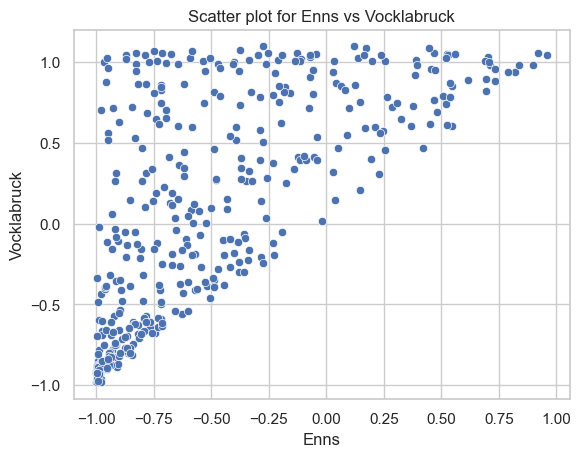

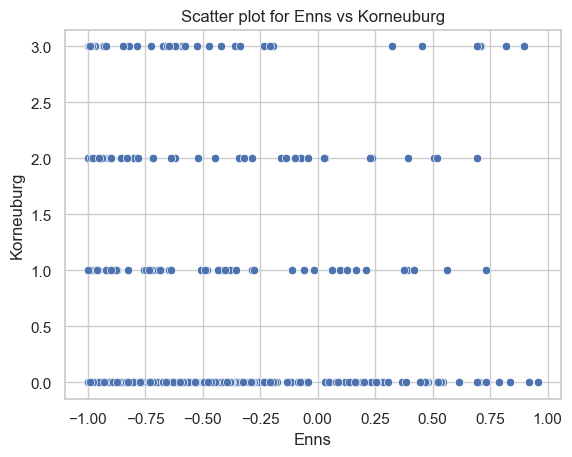

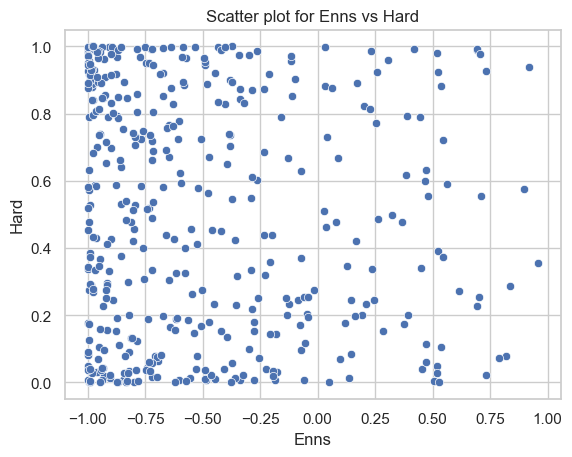

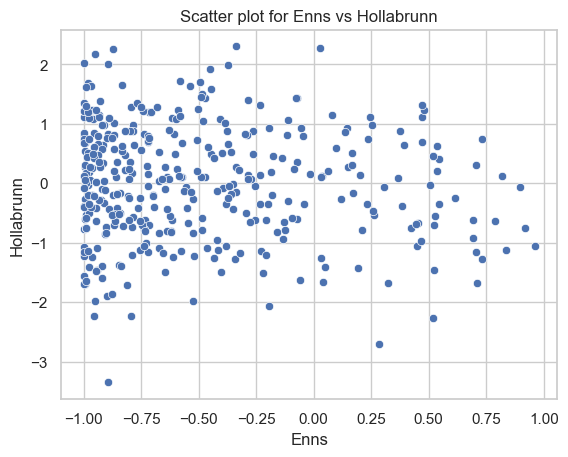

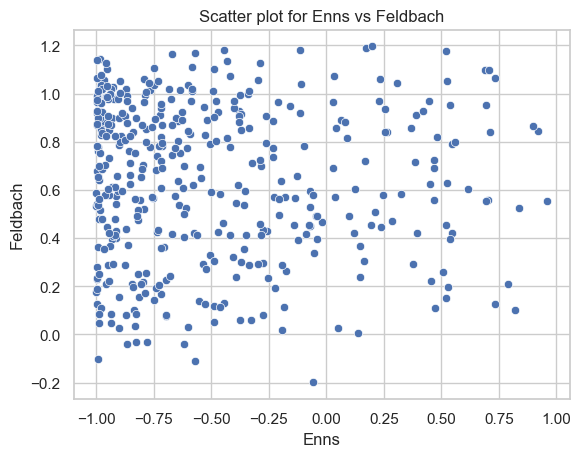

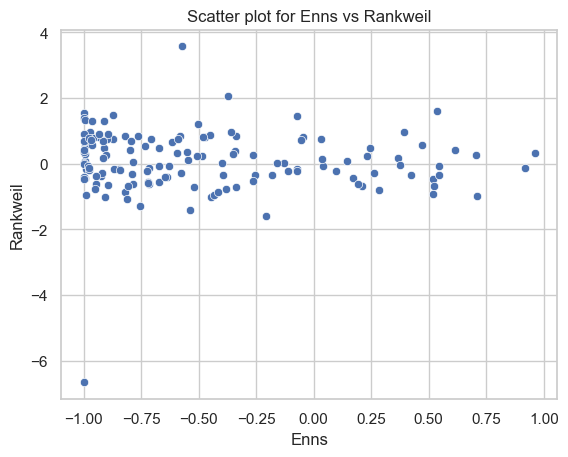

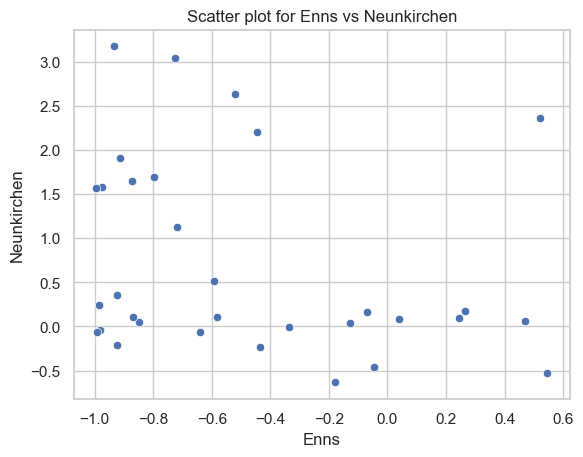

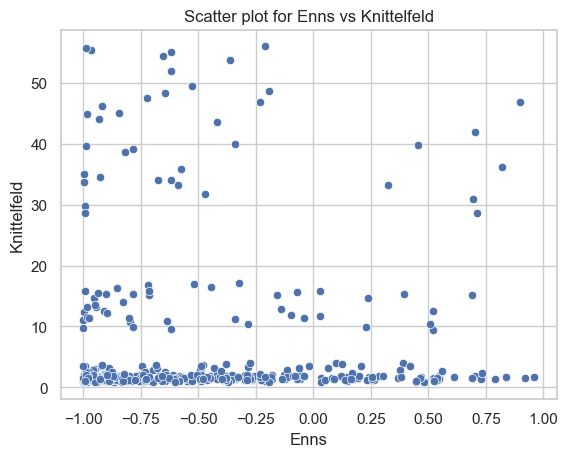

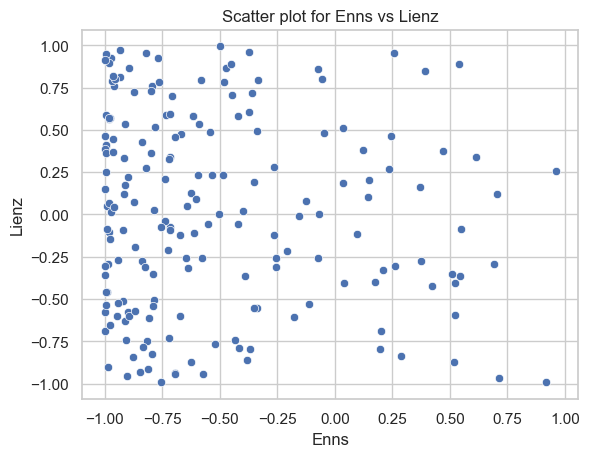

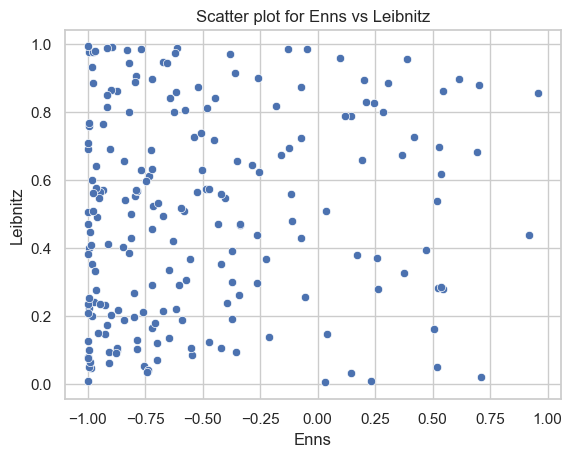

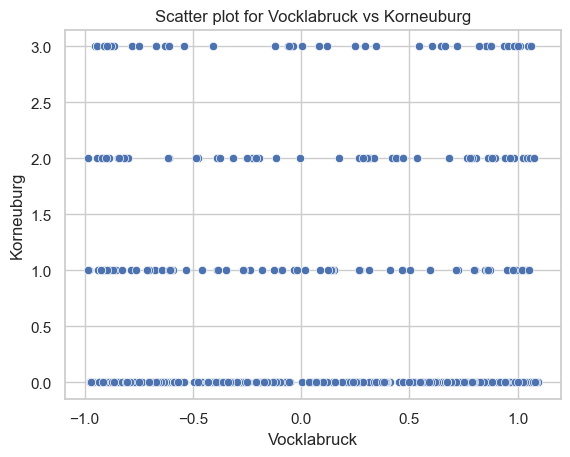

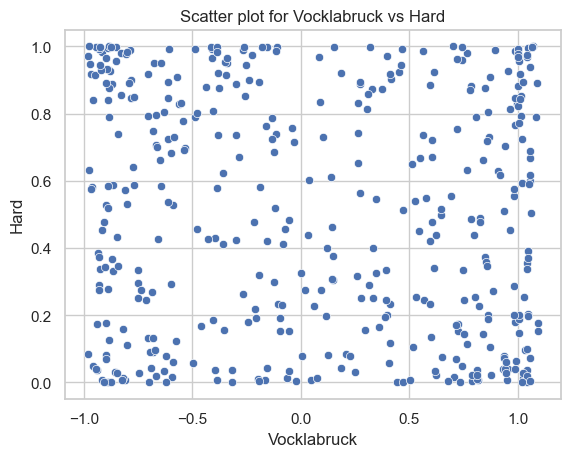

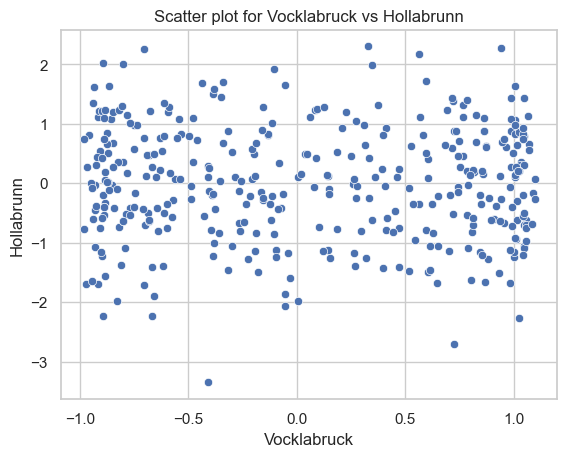

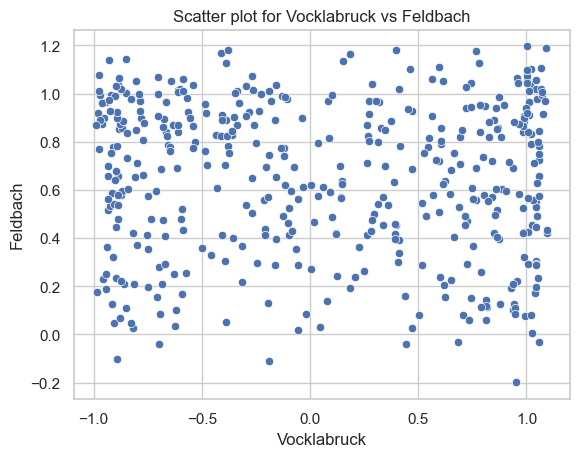

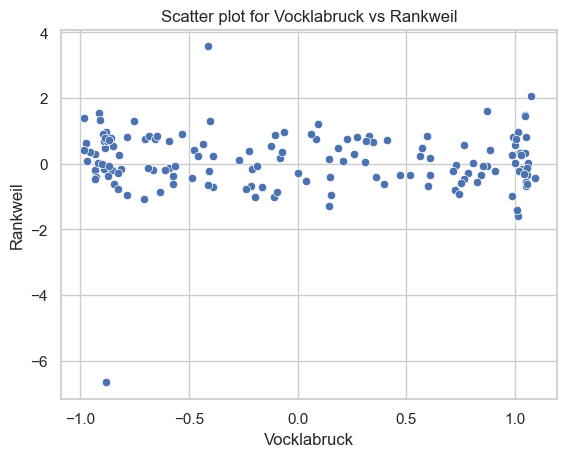

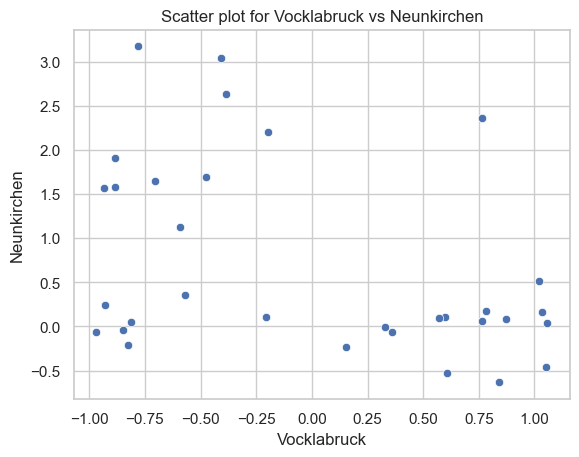

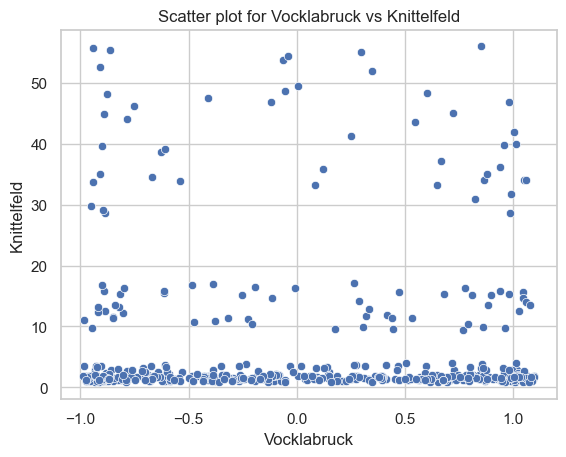

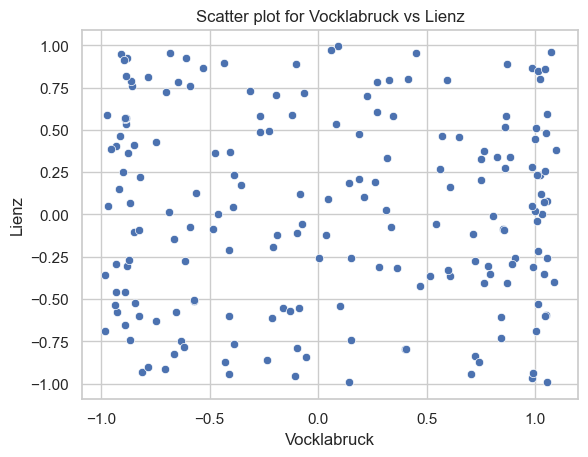

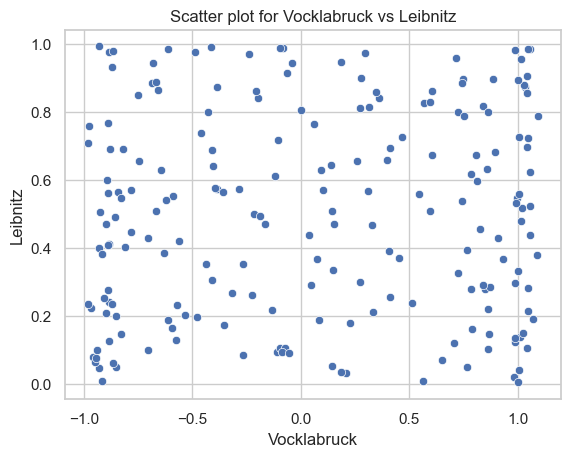

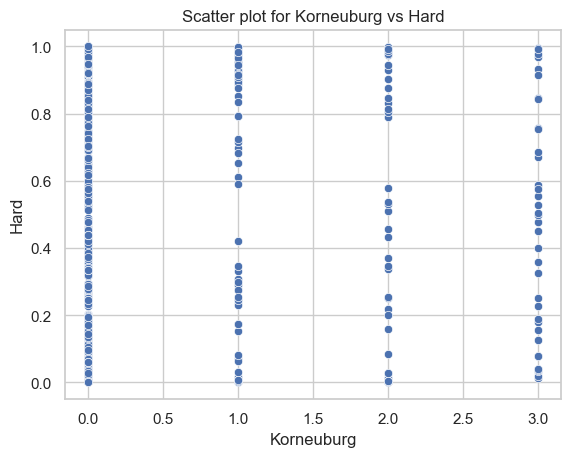

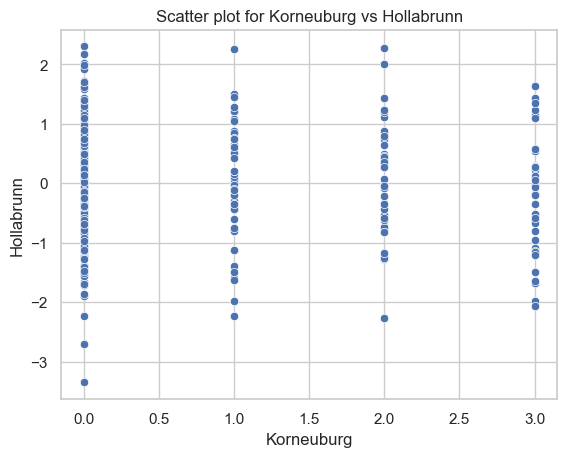

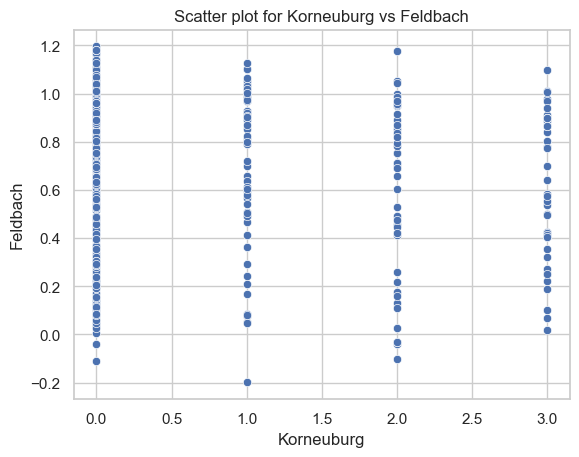

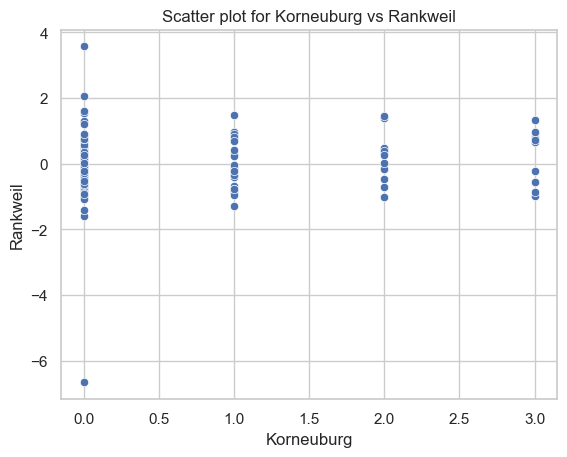

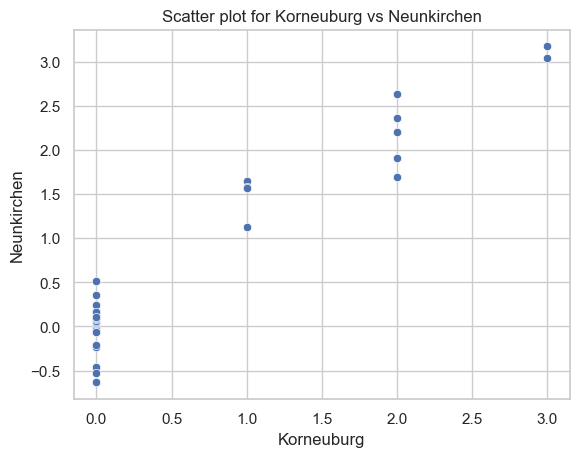

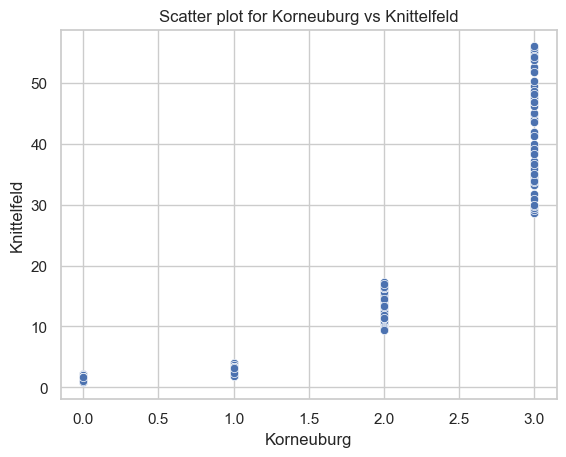

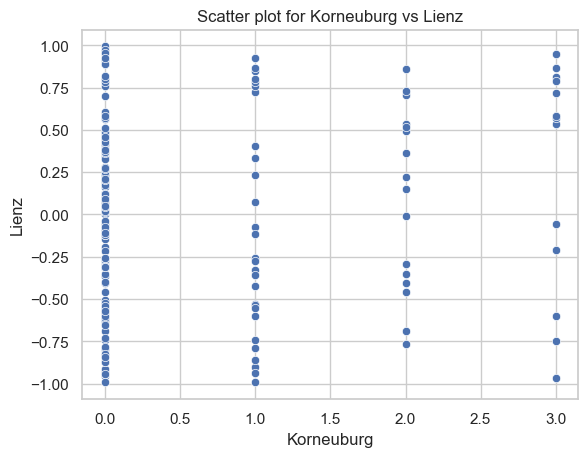

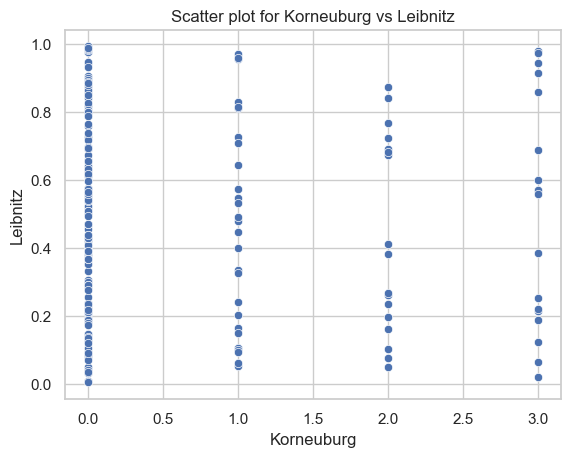

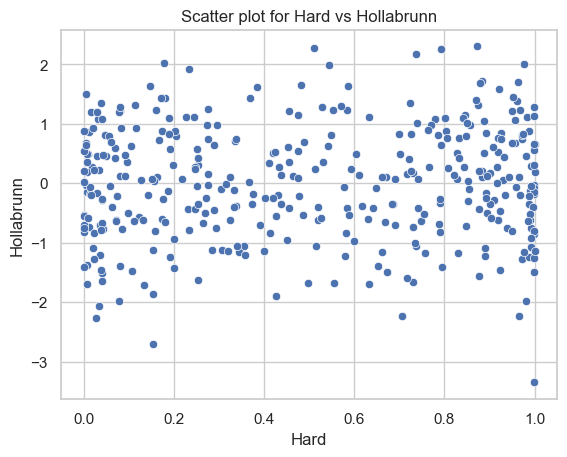

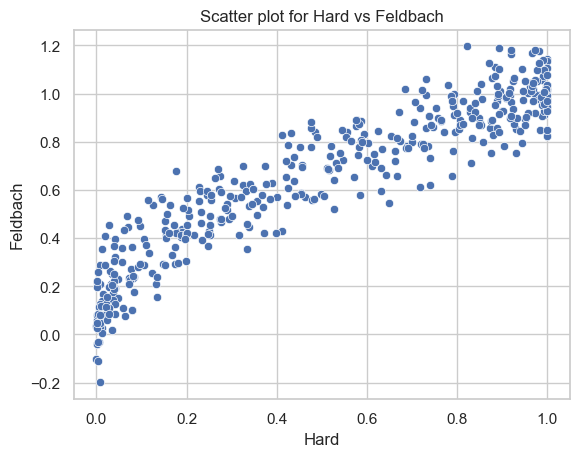

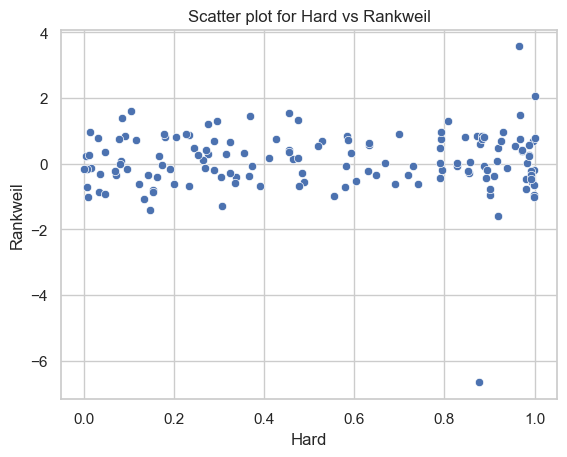

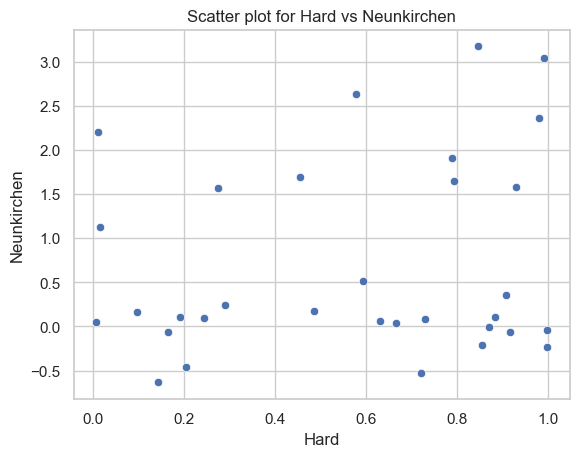

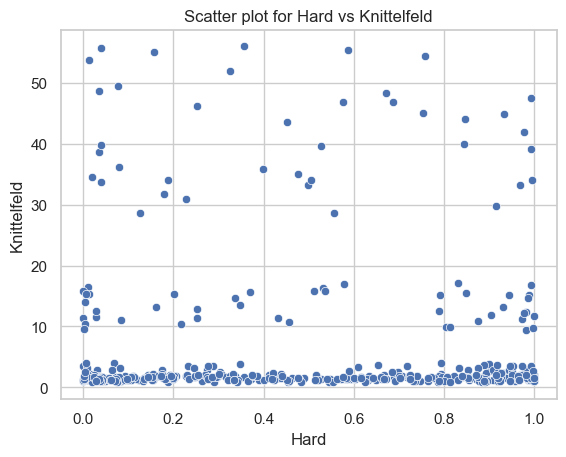

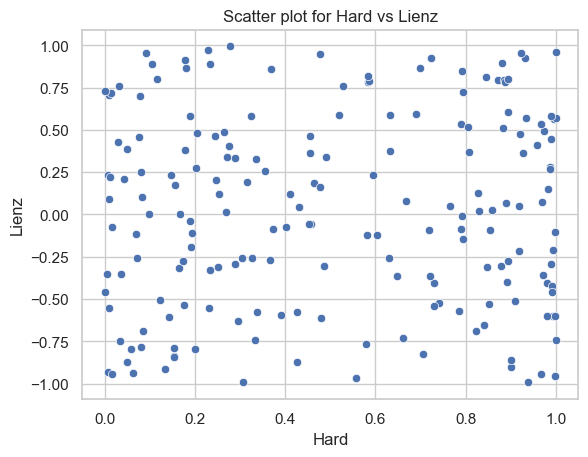

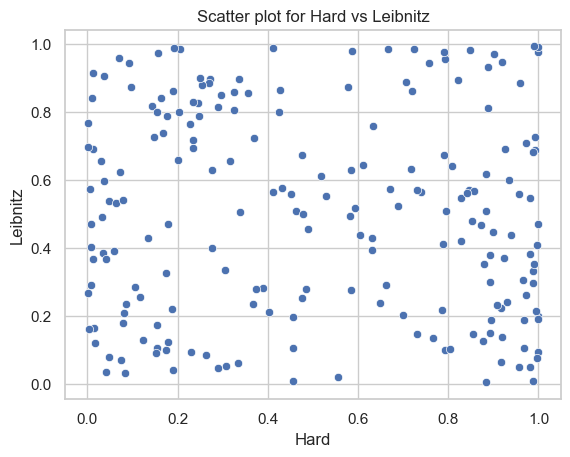

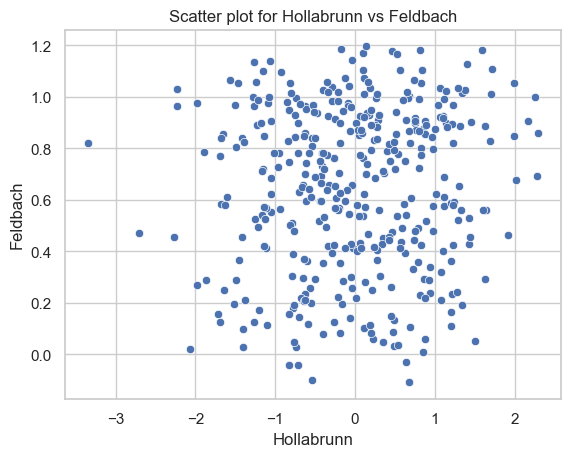

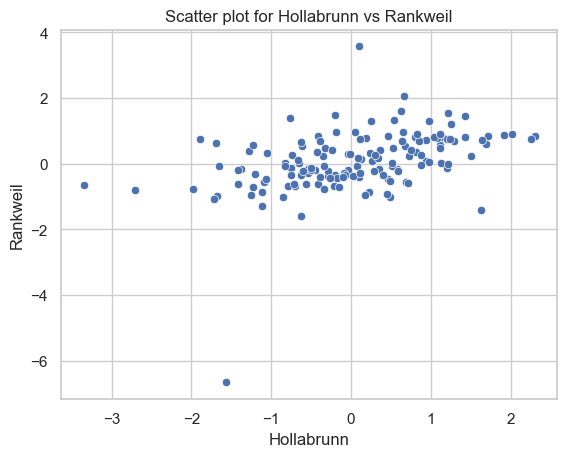

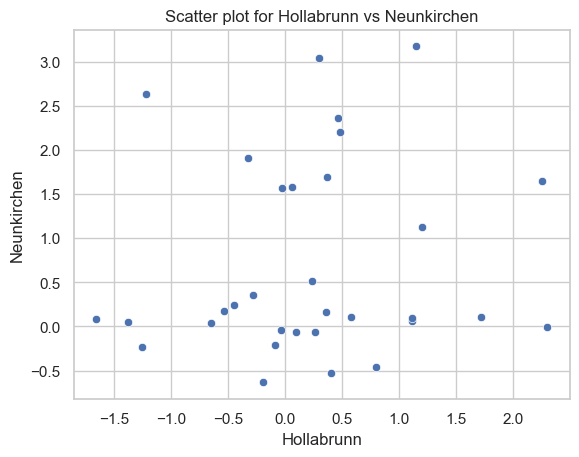

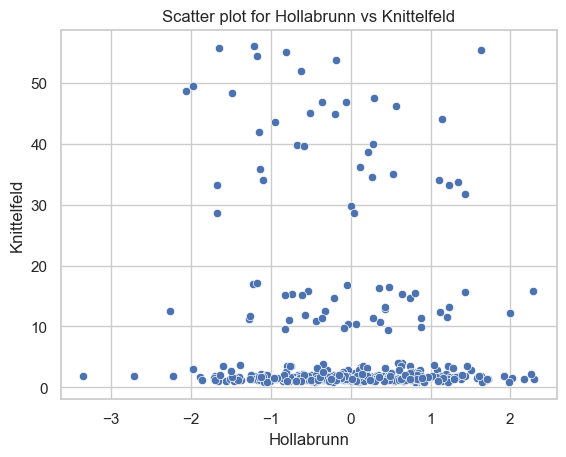

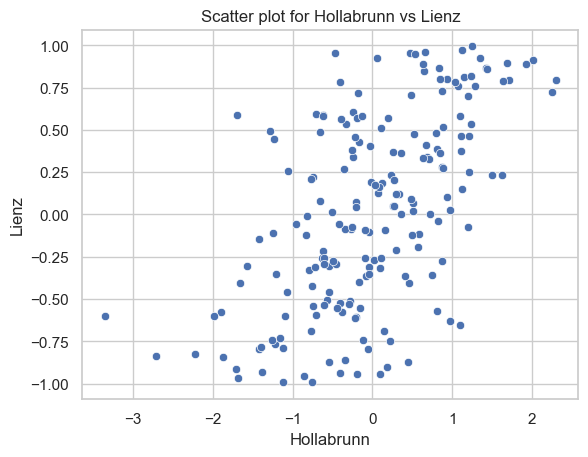

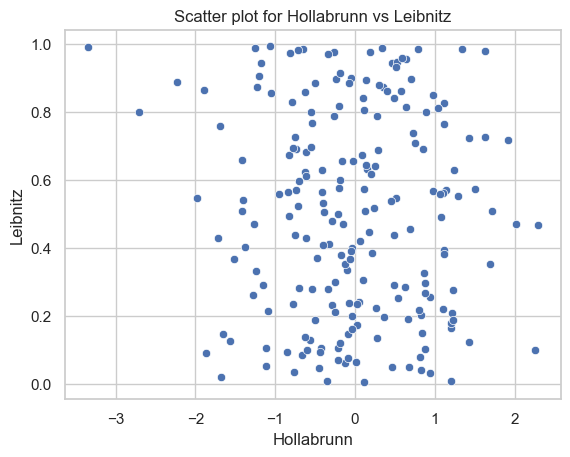

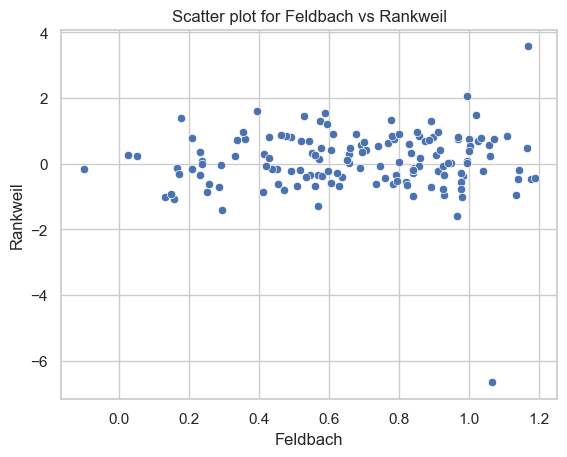

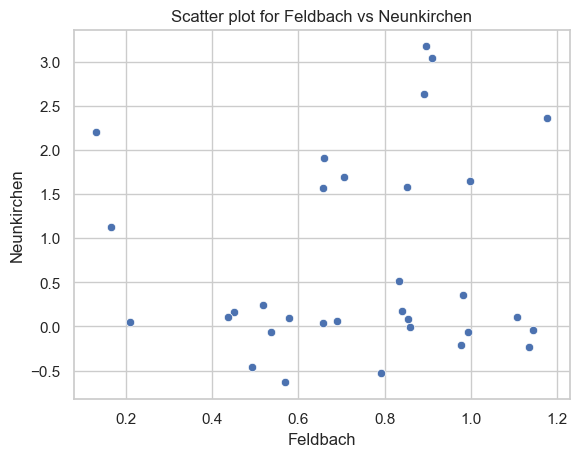

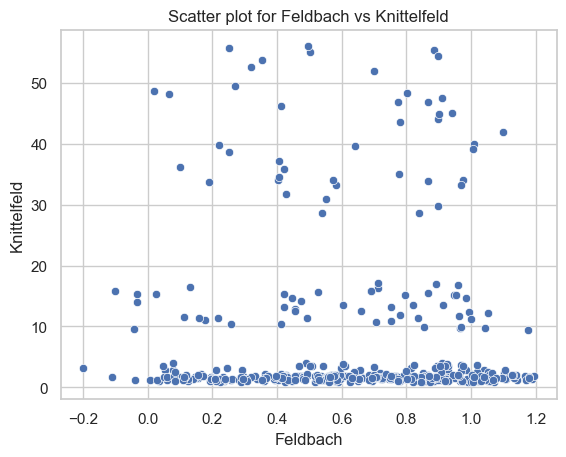

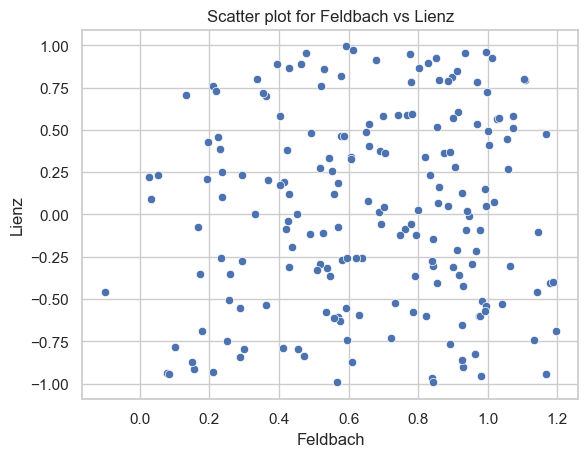

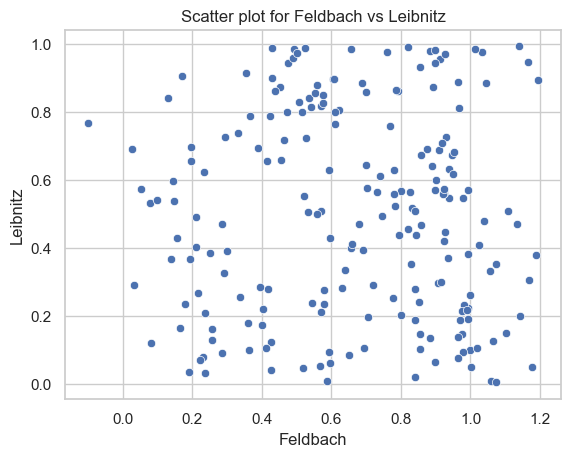

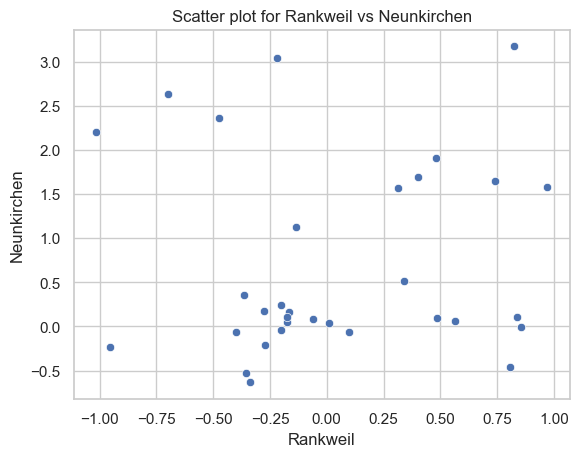

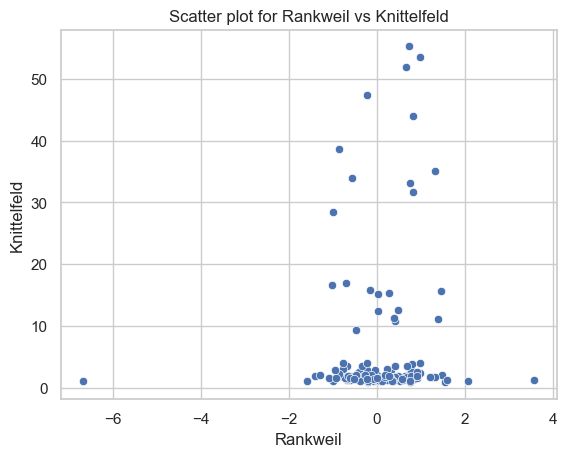

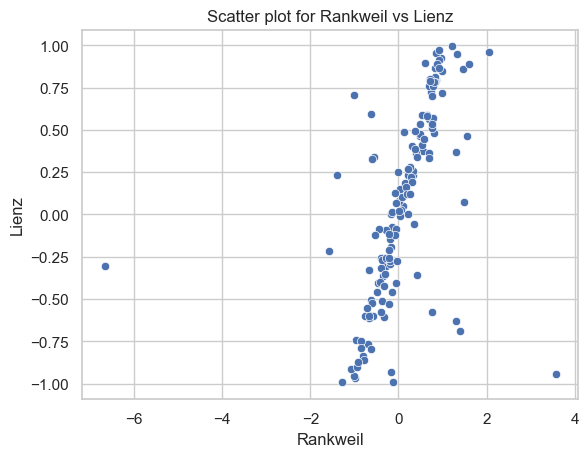

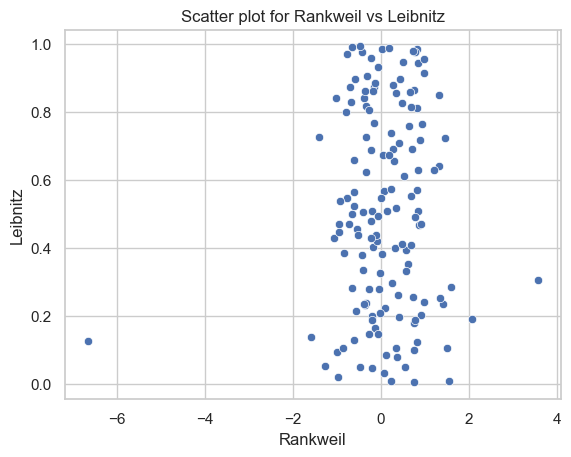

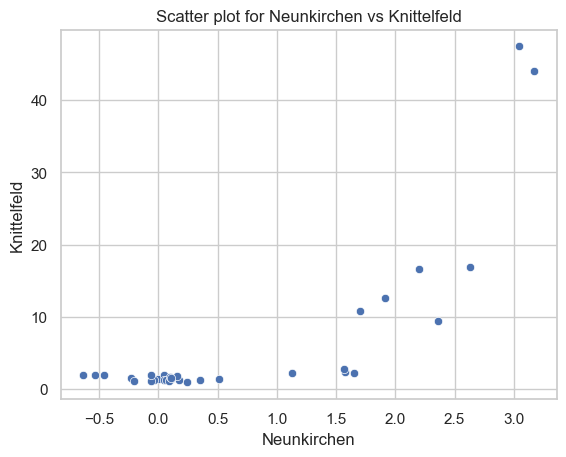

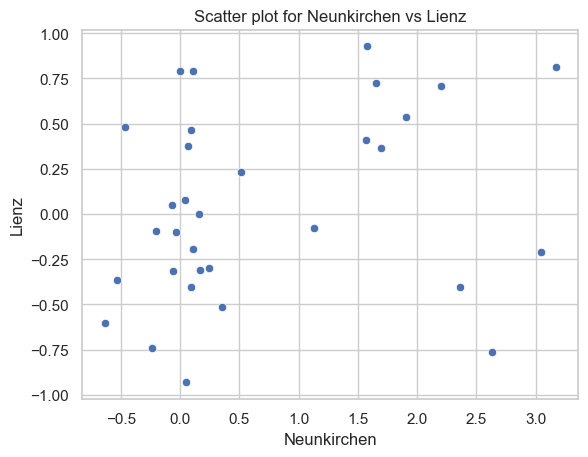

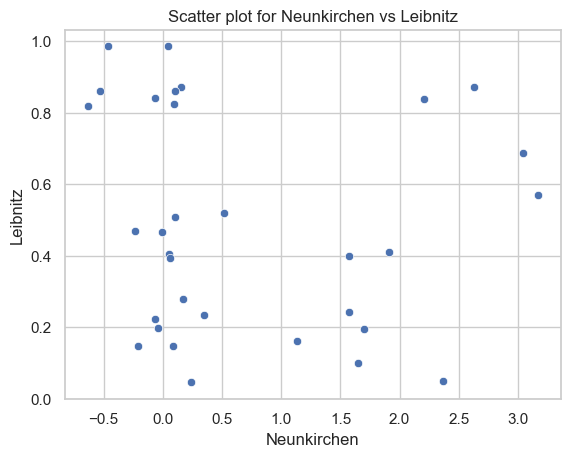

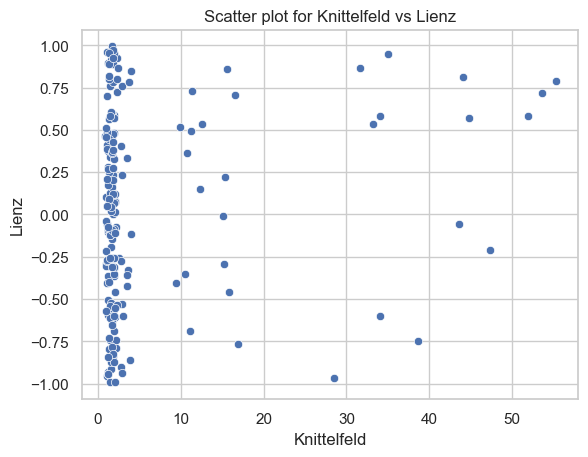

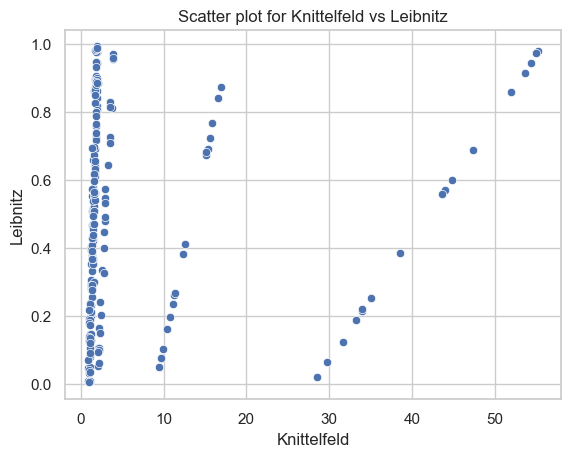

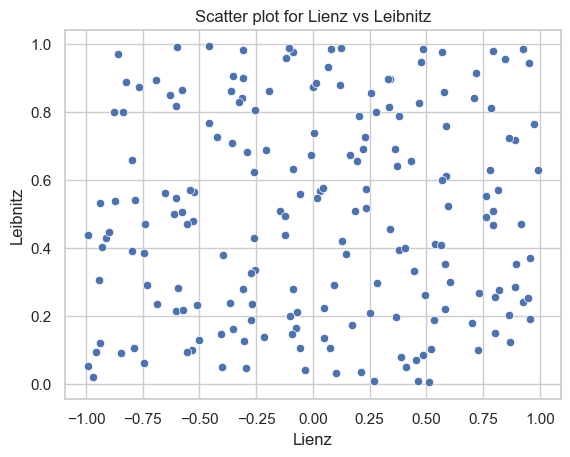

In [36]:
import seaborn as sns
from itertools import combinations

variables = ["Enns", "Vocklabruck", "Korneuburg", "Hard", "Hollabrunn",
             "Feldbach", "Rankweil", "Neunkirchen", "Knittelfeld", "Lienz", "Leibnitz"]

# Generate unique combinations of 2 variables
combinations_2 = list(combinations(variables, 2))

# Plot scatter plots for each combination
for var1, var2 in combinations_2:
    sns.scatterplot(x=upperOriginal[var1], y=upperOriginal[var2])
    plt.title(f"Scatter plot for {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [37]:

for column in to_drop:
    print( correlation_matrix[column].loc[correlation_matrix[column] > threshold] )
    print('--------------------------------------------------------')
    
# correlation_matrix['Hollabrunn'].loc[correlation_matrix['Hollabrunn'] > 0.55]
# correlation_matrix
# significa que por exemplo a variable knittelfeld esta correlacionada com a neunkirchen por 85% e com a korneuburg por 88%

Series([], Name: Hollabrunn, dtype: float64)
--------------------------------------------------------
Series([], Name: Feldbach, dtype: float64)
--------------------------------------------------------
Series([], Name: Vocklabruck, dtype: float64)
--------------------------------------------------------
Series([], Name: Knittelfeld, dtype: float64)
--------------------------------------------------------
Series([], Name: Korneuburg, dtype: float64)
--------------------------------------------------------


# Spearman's correlation, non-linear

In [38]:
# Correlacao de spearman. Absolute value to eliminate negatives even though it's a legit correlation
spearman_corr = correlationDataset.corr(method='spearman').abs()
spearman_corr

,Unnamed: 0,Cuxhaven,Neu Isenburg,Herzberg,Hohenstein-Ernstthal,Kissing,Numbrecht,Diepholz,Meschede,Efringen-Kirchen,...,Stadthagen,Seesen,Hettstedt,Ladenburg,Taunusstein,Heubach,Tutzing,Kressbronn am Bodensee,Wernau,Karben
Unnamed: 0,1.000000,0.018792,0.003502,0.022921,0.039832,0.012639,0.020868,0.013149,0.001748,0.018989,...,0.029925,0.009155,0.012896,0.046793,0.050938,0.026705,0.017634,0.058388,0.013067,0.053584
Cuxhaven,0.018792,1.000000,0.049822,0.021531,0.065990,0.028533,0.023854,0.039008,0.016409,0.006475,...,0.037296,0.014708,0.005903,0.000108,0.047465,0.060431,0.027898,0.013209,0.058712,0.030034
Neu Isenburg,0.003502,0.049822,1.000000,0.034004,0.030819,0.002131,0.007979,0.016930,0.003115,0.042815,...,0.004101,0.069586,0.018394,0.061059,0.060774,0.055387,0.030547,0.009912,0.031080,0.009729
Herzberg,0.022921,0.021531,0.034004,1.000000,0.017825,0.012584,0.046155,0.019849,0.072370,0.060051,...,0.037482,0.058945,0.003195,0.000910,0.028361,0.038100,0.040753,0.016923,0.060226,0.000180
Hohenstein-Ernstthal,0.039832,0.065990,0.030819,0.017825,1.000000,0.039022,0.007107,0.056328,0.010753,0.006323,...,0.015993,0.026345,0.000086,0.038458,0.003293,0.039459,0.031258,0.017712,0.008280,0.058311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Heubach,0.026705,0.060431,0.055387,0.038100,0.039459,0.008396,0.005515,0.009905,0.035921,0.011634,...,0.005930,0.032430,0.018895,0.000155,0.029939,1.000000,0.019049,0.014474,0.001582,0.001313
Tutzing,0.017634,0.027898,0.030547,0.040753,0.031258,0.004980,0.097409,0.010351,0.039916,0.032416,...,0.026875,0.050110,0.033155,0.028851,0.007445,0.019049,1.000000,0.099681,0.000543,0.025714
Kressbronn am Bodensee,0.058388,0.013209,0.009912,0.016923,0.017712,0.021722,0.003758,0.011276,0.038511,0.011054,...,0.026139,0.077949,0.000805,0.050180,0.028551,0.014474,0.099681,1.000000,0.064321,0.046134
Wernau,0.013067,0.058712,0.031080,0.060226,0.008280,0.001031,0.019690,0.006672,0.018573,0.062762,...,0.023906,0.029886,0.017697,0.028163,0.013522,0.001582,0.000543,0.064321,1.000000,0.037172


In [39]:
upperSpearman = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))
# upper

#threshold of 0.55 indicates the variables are "moderately" correlated
threshold = 0.55
to_dropSpearman = [column for column in upper.columns if any(upper[column] > threshold)]
to_dropSpearman


['Hollabrunn', 'Feldbach', 'Vocklabruck', 'Knittelfeld', 'Korneuburg']

In [40]:
#correlation_matrix = spearman_corr
for column in to_dropSpearman:
    print( spearman_corr[column].loc[spearman_corr[column] > threshold] )
    print('--------------------------------------------------------')


Lienz         0.596096
Hollabrunn    1.000000
Name: Hollabrunn, dtype: float64
--------------------------------------------------------
Hard        0.93285
Feldbach    1.00000
Name: Feldbach, dtype: float64
--------------------------------------------------------
Enns           0.756368
Vocklabruck    1.000000
Name: Vocklabruck, dtype: float64
--------------------------------------------------------
Neunkirchen    0.688942
Knittelfeld    1.000000
Korneuburg     0.825523
Name: Knittelfeld, dtype: float64
--------------------------------------------------------
Neunkirchen    0.822252
Knittelfeld    0.825523
Korneuburg     1.000000
Name: Korneuburg, dtype: float64
--------------------------------------------------------


# Dcor or Distance Correlation

In [41]:
# Distance correlation will capture linear and non-linear relations so
# it is very usefull
#Importing the dcor library first
import dcor

In [42]:
# vasco = dcor.distance_correlation(upperOriginal)
def distance_correlation_dataframe(df):
    num_vars = df.shape[1]
    distance_corr_matrix = np.zeros((num_vars, num_vars))

    for i in range(num_vars):
        for j in range(i+1, num_vars):
            # Extract variables i and j from the dataframe
            var_i = df.iloc[:, i].values
            var_j = df.iloc[:, j].values

            # Compute distance correlation between variables i and j
            distance_corr_matrix[i, j] = dcor.distance_correlation(var_i, var_j)
            distance_corr_matrix[j, i] = distance_corr_matrix[i, j]  # Symmetric matrix

    return distance_corr_matrix

vasco = distance_correlation_dataframe(upperOriginal)


SystemError: CPUDispatcher(<function _generate_distance_covariance_sqr_terms_avl_impl.<locals>._distance_covariance_sqr_terms_avl_impl at 0x00000129329E5DA0>) returned a result with an exception set

In [43]:
non_nan_values = vasco[~np.isnan(vasco)]


print("\nStatistics:")
print("Mean:", np.mean(non_nan_values))
print("Median:", np.median(non_nan_values))
print("Minimum:", np.min(non_nan_values))
print("Maximum:", np.max(non_nan_values))
print("Standard Deviation:", np.std(non_nan_values))


NameError: name 'vasco' is not defined

parece que a distance correlation nao descobriu correlacoes fortes

Primeiro metodo - pearson porque e o standar para correlacoes lineares;
2 - spearman porque e para correlacoes nao lineares e menos sensivel a outliers;
3 - distance correlation porque detecta tambem relacoes nao lineares e captura correlacoes entre conjuntos de variable e nao so pairwise
(: Distance correlation can also capture multivariate relationships between sets of variables, whereas Pearson and Spearman correlations are limited to pairwise relationships between individual variables.)




# 4 exercicio

In [49]:
missingValues = pd.read_csv('missing-values-dataset.csv')
missingValues

,Unnamed: 0,semester,gender,height,age,study,likes_pineapple_on_pizza,likes_chocolate,english_skills,books_per_year
0,0,4.0,1.0,165.0,24.0,0.0,0.0,1.0,81.0,9.0
1,1,6.0,1.0,165.0,25.0,0.0,NaN,0.0,85.0,2.0
2,2,12.0,0.0,NaN,26.0,3.0,0.0,1.0,95.0,2.0
3,3,99.0,0.0,NaN,27.0,2.0,0.0,unkwn,89.0,4.0
4,4,99.0,1.0,170.0,27.0,0.0,0.0,1.0,75.0,2.0
...,...,...,...,...,...,...,...,...,...,...
995,995,7.0,0.0,NaN,22.0,1.0,1.0,1.0,97.0,2.0
996,996,99.0,0.0,184.0,30.0,1.0,0.0,1.0,80.0,4.0
997,997,-2.0,0.0,NaN,21.0,0.0,1.0,unkwn,85.0,3.0
998,998,6.0,1.0,172.0,23.0,4.0,0.0,unkwn,90.0,7.0


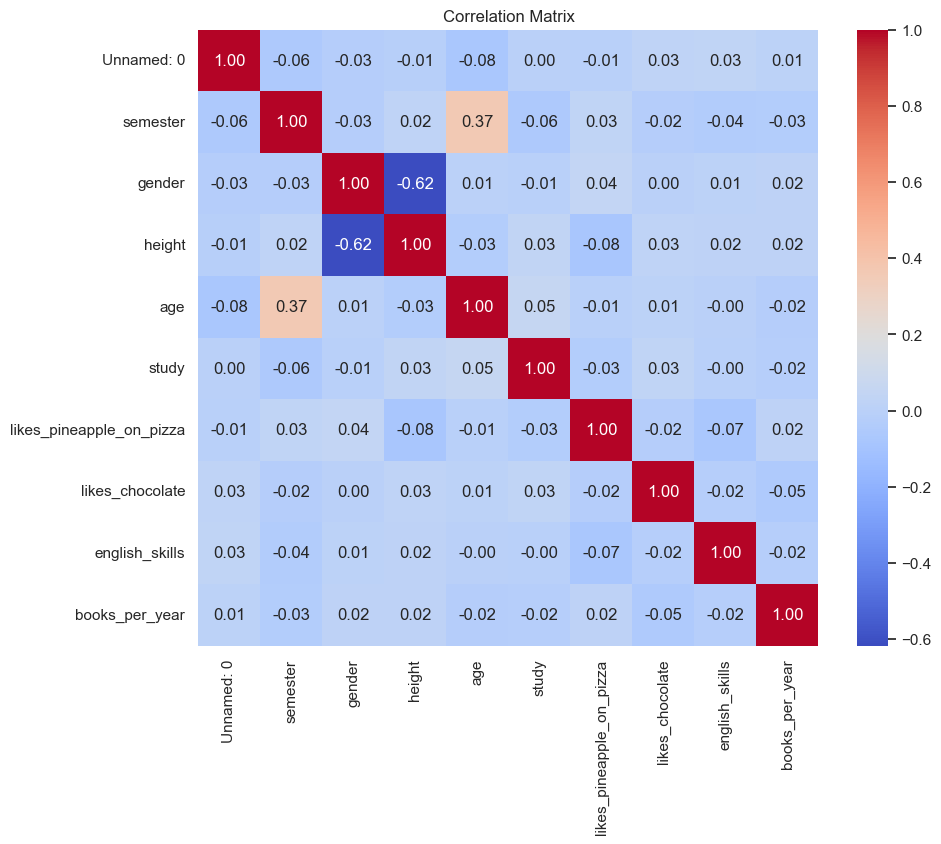

In [50]:
missingValues_numeric = missingValues.replace('unkwn', np.nan).astype(float)
# missingValues_numeric # 1000 rows after 

PearsonMissingValues = missingValues_numeric.corr()
# PearsonMissingValues

plt.figure(figsize=(10, 8))
sns.heatmap(PearsonMissingValues, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# plt.show()
plt.savefig("Missing Values Heatmap.png")

Gender & Height have a strong dependecy and a weak dependency between age and semester

Semester has negative values and those were simply put out to be positive;
Semester also has 99 as a semester value, seems unlikely;
Height has N/A values;
likes_pineapple has unkwn;
likes_pineapple has 0 and 1, but also 0.0 and 1.0;
likes_chocolate has N/A and unkwn;
english_skills has N/A;


In [51]:
# missingValues_numeric = missingValues.replace('unkwn', np.nan).dropna().astype(float)
print("Medians before: ")
for column in missingValues_numeric.columns:
    print( column + " = "+ str(missingValues_numeric[column].median()) )
    
print("-------------------------------------------------------------------")    
print("Averages before: ")
for column in missingValues_numeric.columns:
    print( column + " = "+ str(missingValues_numeric[column].mean()) )
    

Medians before: 
Unnamed: 0 = 499.5
semester = 12.0
gender = 0.0
height = 173.0
age = 25.0
study = 1.0
likes_pineapple_on_pizza = 0.0
likes_chocolate = 1.0
english_skills = 88.0
books_per_year = 3.0
-------------------------------------------------------------------
Averages before: 
Unnamed: 0 = 499.5
semester = 27.751
gender = 0.314
height = 172.17108433734938
age = 25.876
study = 2.037
likes_pineapple_on_pizza = 0.3183023872679045
likes_chocolate = 0.8149847094801224
english_skills = 86.77207637231504
books_per_year = 3.775


In [60]:
# EXTRA POINTS !! DOING linear regression for the semester!
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(missingValues_numeric['semester'], missingValues_numeric['gender'])

missingValues_numeric['semester'].reshape((-1,1))


AttributeError: 'Series' object has no attribute 'reshape'

In [52]:
#Taking care of the semester column
# missingValues_numeric['semester'] = missingValues['semester'].abs()
# missingValues_numeric['semester'] = missingValues_numeric['semester'].replace(99, 0)
# missingValues_numeric['semester']

#taking care of the Height column
missingValues_numeric['height'] = missingValues_numeric['height'].fillna(172.17108433734938)
# missingValues_numeric['height']

#taking care of the likes pineapple column
missingValues_numeric['likes_pineapple_on_pizza'] = missingValues_numeric['likes_pineapple_on_pizza'].replace(0.0, 0)
missingValues_numeric['likes_pineapple_on_pizza'] = missingValues_numeric['likes_pineapple_on_pizza'].replace(1.0, 1)
missingValues_numeric['likes_pineapple_on_pizza'] = missingValues_numeric['likes_pineapple_on_pizza'].fillna(0.0)
# missingValues_numeric['likes_pineapple_on_pizza']

#takign care of likes_chocolate
missingValues_numeric['likes_chocolate'] = missingValues_numeric['likes_chocolate'].fillna(1.0)
# missingValues_numeric['likes_chocolate']

#taking care of english-skills
missingValues_numeric['english_skills'] = missingValues_numeric['english_skills'].fillna(86.77207637231504)
# missingValues_numeric['english_skills']

#taking care of book per year
missingValues_numeric['books_per_year'] = missingValues_numeric['books_per_year'].fillna(0)
# missingValues_numeric['books_per_year']


In [53]:
print("Medians After: ")
for column in missingValues_numeric.columns:
    print( column + " = "+ str(missingValues_numeric[column].median()) )
    
print("-------------------------------------------------------------------")    
print("Averages After: ")
for column in missingValues_numeric.columns:
    print( column + " = "+ str(missingValues_numeric[column].mean()) )

Medians After: 
Unnamed: 0 = 499.5
semester = 12.0
gender = 0.0
height = 172.17108433734938
age = 25.0
study = 1.0
likes_pineapple_on_pizza = 0.0
likes_chocolate = 1.0
english_skills = 86.77207637231504
books_per_year = 3.0
-------------------------------------------------------------------
Averages After: 
Unnamed: 0 = 499.5
semester = 27.751
gender = 0.314
height = 172.1710843373494
age = 25.876
study = 2.037
likes_pineapple_on_pizza = 0.24
likes_chocolate = 0.879
english_skills = 86.77207637231503
books_per_year = 3.775
